# Brown Datathon 2018 - GDELT

In [ ]:
import os
import pandas as pd
import numpy as np
import datetime
import re
import pickle
%pylab inline

## Get Stock Data from Marquee

In [ ]:
# Getting access token

import requests
import json
import pandas as pd
import numpy as np
import pandas as pd

auth_data = {
    'grant_type'    : 'client_credentials',
    'client_id'     : # redacted out
    'client_secret' : # redacted out
    'scope'         : 'read_product_data read_financial_data read_content'
}

# create Session instance
session = requests.Session()

# make a POST to retrieve access_token
auth_request = session.post('https://idfs.gs.com/as/token.oauth2', data = auth_data)
access_token_dict = json.loads(auth_request.text)
access_token = access_token_dict['access_token']

# update session headers
session.headers.update({'Authorization':'Bearer '+ access_token})

print(access_token)

In [ ]:
# Grabbing all gsids
request_url = 'https://api.marquee.gs.com/v1/data/USCANFPP_MINI/coverage?limit=100'
request = session.get(url=request_url)
data = json.loads(request.text)
df = pd.DataFrame(data['results'])
gsids = df.gsid
# gsids to ticker and name
payload = {
    "where": {
        "gsid": gsids.tolist()
    },
    "fields": [ "gsid", "ticker", "name" ],
    "limit": 10000
}

request_url = 'https://api.marquee.gs.com/v1/assets/data/query'
request = session.post(url=request_url, json = payload)
results = json.loads(request.text)
IDNameTable = results['results']

In [ ]:
#pickle.dump(IDNameTable,open("IDNameTable.pkl","wb"))

In [ ]:
IDNameTable=pickle.load(open("IDNameTable.pkl","rb"))
gsidtoindex = {IDNameTable[i]['gsid']:i for i in range(len(IDNameTable))}
gsidtoname={d['gsid']:d['name'] for d in IDNameTable}

## Extract ToneAverage from GELDT datasets

In [ ]:
# download from http://data.gdeltproject.org/events/index.html
# the following creates a text file with the download urls
# to be downloaded from terminal using wget -i
gdeltfiles = [["20180302.export.CSV.zip","(13.5MB)"],["20180301.export.CSV.zip","(14.7MB)"],["20180228.export.CSV.zip","(14.6MB)"],["20180227.export.CSV.zip","(13.3MB)"],["20180226.export.CSV.zip","(11.9MB)"],["20180225.export.CSV.zip","(7.2MB)"],["20180224.export.CSV.zip","(8.7MB)"],["20180223.export.CSV.zip","(13.6MB)"],["20180222.export.CSV.zip","(14.1MB)"],["20180221.export.CSV.zip","(14.3MB)"],["20180220.export.CSV.zip","(13.6MB)"],["20180219.export.CSV.zip","(10.8MB)"],["20180218.export.CSV.zip","(7.0MB)"],["20180217.export.CSV.zip","(8.5MB)"],["20180216.export.CSV.zip","(13.3MB)"],["20180215.export.CSV.zip","(13.8MB)"],["20180214.export.CSV.zip","(14.0MB)"],["20180213.export.CSV.zip","(13.6MB)"],["20180212.export.CSV.zip","(12.1MB)"],["20180211.export.CSV.zip","(7.1MB)"],["20180210.export.CSV.zip","(8.7MB)"],["20180209.export.CSV.zip","(12.8MB)"],["20180208.export.CSV.zip","(13.5MB)"],["20180207.export.CSV.zip","(13.5MB)"],["20180206.export.CSV.zip","(13.4MB)"],["20180205.export.CSV.zip","(11.6MB)"],["20180204.export.CSV.zip","(6.6MB)"],["20180203.export.CSV.zip","(7.9MB)"],["20180202.export.CSV.zip","(13.3MB)"],["20180201.export.CSV.zip","(13.7MB)"],["20180131.export.CSV.zip","(13.8MB)"],["20180130.export.CSV.zip","(13.2MB)"],["20180129.export.CSV.zip","(11.3MB)"],["20180128.export.CSV.zip","(7.1MB)"],["20180127.export.CSV.zip","(8.3MB)"],["20180126.export.CSV.zip","(12.9MB)"],["20180125.export.CSV.zip","(14.1MB)"],["20180124.export.CSV.zip","(14.2MB)"],["20180123.export.CSV.zip","(13.6MB)"],["20180122.export.CSV.zip","(12.3MB)"],["20180121.export.CSV.zip","(7.6MB)"],["20180120.export.CSV.zip","(8.5MB)"],["20180119.export.CSV.zip","(13.5MB)"],["20180118.export.CSV.zip","(13.7MB)"],["20180117.export.CSV.zip","(13.8MB)"],["20180116.export.CSV.zip","(13.1MB)"],["20180115.export.CSV.zip","(10.4MB)"],["20180114.export.CSV.zip","(6.6MB)"],["20180113.export.CSV.zip","(7.9MB)"],["20180112.export.CSV.zip","(13.0MB)"],["20180111.export.CSV.zip","(13.6MB)"],["20180110.export.CSV.zip","(13.5MB)"],["20180109.export.CSV.zip","(12.3MB)"],["20180108.export.CSV.zip","(10.4MB)"],["20180107.export.CSV.zip","(5.8MB)"],["20180106.export.CSV.zip","(7.4MB)"],["20180105.export.CSV.zip","(11.1MB)"],["20180104.export.CSV.zip","(11.7MB)"],["20180103.export.CSV.zip","(11.2MB)"],["20180102.export.CSV.zip","(8.7MB)"],["20180101.export.CSV.zip","(5.6MB)"],["20171231.export.CSV.zip","(5.4MB)"],["20171230.export.CSV.zip","(6.0MB)"],["20171229.export.CSV.zip","(8.9MB)"],["20171228.export.CSV.zip","(9.4MB)"],["20171227.export.CSV.zip","(8.9MB)"],["20171226.export.CSV.zip","(7.1MB)"],["20171225.export.CSV.zip","(5.1MB)"],["20171224.export.CSV.zip","(5.5MB)"],["20171223.export.CSV.zip","(6.7MB)"],["20171222.export.CSV.zip","(11.1MB)"],["20171221.export.CSV.zip","(12.5MB)"],["20171220.export.CSV.zip","(12.5MB)"],["20171219.export.CSV.zip","(12.4MB)"],["20171218.export.CSV.zip","(10.5MB)"],["20171217.export.CSV.zip","(6.3MB)"],["20171216.export.CSV.zip","(7.1MB)"],["20171215.export.CSV.zip","(12.2MB)"],["20171214.export.CSV.zip","(13.1MB)"],["20171213.export.CSV.zip","(13.6MB)"],["20171212.export.CSV.zip","(12.9MB)"],["20171211.export.CSV.zip","(11.2MB)"],["20171210.export.CSV.zip","(6.9MB)"],["20171209.export.CSV.zip","(7.8MB)"],["20171208.export.CSV.zip","(13.8MB)"],["20171207.export.CSV.zip","(14.8MB)"],["20171206.export.CSV.zip","(14.3MB)"],["20171205.export.CSV.zip","(14.1MB)"],["20171204.export.CSV.zip","(11.8MB)"],["20171203.export.CSV.zip","(6.5MB)"],["20171202.export.CSV.zip","(8.0MB)"],["20171201.export.CSV.zip","(13.5MB)"],["20171130.export.CSV.zip","(14.4MB)"],["20171129.export.CSV.zip","(14.9MB)"],["20171128.export.CSV.zip","(14.0MB)"],["20171127.export.CSV.zip","(11.5MB)"],["20171126.export.CSV.zip","(6.3MB)"],["20171125.export.CSV.zip","(6.6MB)"],["20171124.export.CSV.zip","(10.3MB)"],["20171123.export.CSV.zip","(10.5MB)"],["20171122.export.CSV.zip","(13.7MB)"],["20171121.export.CSV.zip","(14.1MB)"],["20171120.export.CSV.zip","(11.9MB)"],["20171119.export.CSV.zip","(6.8MB)"],["20171118.export.CSV.zip","(8.1MB)"],["20171117.export.CSV.zip","(13.6MB)"],["20171116.export.CSV.zip","(14.3MB)"],["20171115.export.CSV.zip","(14.9MB)"],["20171114.export.CSV.zip","(14.4MB)"],["20171113.export.CSV.zip","(12.6MB)"],["20171112.export.CSV.zip","(7.6MB)"],["20171111.export.CSV.zip","(8.6MB)"],["20171110.export.CSV.zip","(14.3MB)"],["20171109.export.CSV.zip","(14.9MB)"],["20171108.export.CSV.zip","(15.0MB)"],["20171107.export.CSV.zip","(14.8MB)"],["20171106.export.CSV.zip","(12.8MB)"],["20171105.export.CSV.zip","(7.1MB)"],["20171104.export.CSV.zip","(8.1MB)"],["20171103.export.CSV.zip","(14.1MB)"],["20171102.export.CSV.zip","(14.2MB)"],["20171101.export.CSV.zip","(14.8MB)"],["20171031.export.CSV.zip","(14.3MB)"],["20171030.export.CSV.zip","(12.5MB)"],["20171029.export.CSV.zip","(7.0MB)"],["20171028.export.CSV.zip","(7.7MB)"],["20171027.export.CSV.zip","(13.4MB)"],["20171026.export.CSV.zip","(14.8MB)"],["20171025.export.CSV.zip","(14.5MB)"],["20171024.export.CSV.zip","(14.2MB)"],["20171023.export.CSV.zip","(13.2MB)"],["20171022.export.CSV.zip","(7.1MB)"],["20171021.export.CSV.zip","(7.8MB)"],["20171020.export.CSV.zip","(13.7MB)"],["20171019.export.CSV.zip","(14.2MB)"],["20171018.export.CSV.zip","(13.6MB)"],["20171017.export.CSV.zip","(14.2MB)"],["20171016.export.CSV.zip","(11.7MB)"],["20171015.export.CSV.zip","(7.0MB)"],["20171014.export.CSV.zip","(8.0MB)"],["20171013.export.CSV.zip","(13.5MB)"],["20171012.export.CSV.zip","(14.1MB)"],["20171011.export.CSV.zip","(13.5MB)"],["20171010.export.CSV.zip","(12.9MB)"],["20171009.export.CSV.zip","(11.3MB)"],["20171008.export.CSV.zip","(6.7MB)"],["20171007.export.CSV.zip","(7.8MB)"],["20171006.export.CSV.zip","(12.4MB)"],["20171005.export.CSV.zip","(13.6MB)"],["20171004.export.CSV.zip","(13.2MB)"],["20171003.export.CSV.zip","(13.5MB)"],["20171002.export.CSV.zip","(11.4MB)"],["20171001.export.CSV.zip","(6.1MB)"],["20170930.export.CSV.zip","(7.3MB)"],["20170929.export.CSV.zip","(12.4MB)"],["20170928.export.CSV.zip","(13.1MB)"],["20170927.export.CSV.zip","(13.4MB)"],["20170926.export.CSV.zip","(13.3MB)"],["20170925.export.CSV.zip","(12.3MB)"],["20170924.export.CSV.zip","(6.5MB)"],["20170923.export.CSV.zip","(8.2MB)"],["20170922.export.CSV.zip","(13.1MB)"],["20170921.export.CSV.zip","(14.8MB)"],["20170920.export.CSV.zip","(14.7MB)"],["20170919.export.CSV.zip","(14.6MB)"],["20170918.export.CSV.zip","(12.7MB)"],["20170917.export.CSV.zip","(7.3MB)"],["20170916.export.CSV.zip","(8.4MB)"],["20170915.export.CSV.zip","(13.2MB)"],["20170914.export.CSV.zip","(14.9MB)"],["20170913.export.CSV.zip","(14.9MB)"],["20170912.export.CSV.zip","(14.3MB)"],["20170911.export.CSV.zip","(13.1MB)"],["20170910.export.CSV.zip","(7.3MB)"],["20170909.export.CSV.zip","(8.0MB)"],["20170908.export.CSV.zip","(13.9MB)"],["20170907.export.CSV.zip","(14.7MB)"],["20170906.export.CSV.zip","(15.0MB)"],["20170905.export.CSV.zip","(13.1MB)"],["20170904.export.CSV.zip","(9.8MB)"],["20170903.export.CSV.zip","(6.9MB)"],["20170902.export.CSV.zip","(7.6MB)"],["20170901.export.CSV.zip","(12.3MB)"],["20170831.export.CSV.zip","(12.8MB)"],["20170830.export.CSV.zip","(14.2MB)"],["20170829.export.CSV.zip","(13.8MB)"],["20170828.export.CSV.zip","(11.3MB)"],["20170827.export.CSV.zip","(6.7MB)"],["20170826.export.CSV.zip","(7.9MB)"],["20170825.export.CSV.zip","(12.7MB)"],["20170824.export.CSV.zip","(13.6MB)"],["20170823.export.CSV.zip","(14.3MB)"],["20170822.export.CSV.zip","(13.1MB)"],["20170821.export.CSV.zip","(11.7MB)"],["20170820.export.CSV.zip","(6.8MB)"],["20170819.export.CSV.zip","(8.5MB)"],["20170818.export.CSV.zip","(12.5MB)"],["20170817.export.CSV.zip","(14.3MB)"],["20170816.export.CSV.zip","(13.7MB)"],["20170815.export.CSV.zip","(13.4MB)"],["20170814.export.CSV.zip","(11.6MB)"],["20170813.export.CSV.zip","(6.6MB)"],["20170812.export.CSV.zip","(7.5MB)"],["20170811.export.CSV.zip","(11.8MB)"],["20170810.export.CSV.zip","(12.3MB)"],["20170809.export.CSV.zip","(13.4MB)"],["20170808.export.CSV.zip","(12.8MB)"],["20170807.export.CSV.zip","(11.8MB)"],["20170806.export.CSV.zip","(7.0MB)"],["20170805.export.CSV.zip","(7.8MB)"],["20170804.export.CSV.zip","(12.9MB)"],["20170803.export.CSV.zip","(13.3MB)"],["20170802.export.CSV.zip","(14.1MB)"],["20170801.export.CSV.zip","(13.2MB)"],["20170731.export.CSV.zip","(11.9MB)"],["20170730.export.CSV.zip","(7.1MB)"],["20170729.export.CSV.zip","(8.2MB)"],["20170728.export.CSV.zip","(13.1MB)"],["20170727.export.CSV.zip","(13.1MB)"],["20170726.export.CSV.zip","(13.3MB)"],["20170725.export.CSV.zip","(13.5MB)"],["20170724.export.CSV.zip","(12.0MB)"],["20170723.export.CSV.zip","(6.8MB)"],["20170722.export.CSV.zip","(8.1MB)"],["20170721.export.CSV.zip","(12.3MB)"],["20170720.export.CSV.zip","(12.7MB)"],["20170719.export.CSV.zip","(13.4MB)"],["20170718.export.CSV.zip","(12.2MB)"],["20170717.export.CSV.zip","(11.3MB)"],["20170716.export.CSV.zip","(6.2MB)"],["20170715.export.CSV.zip","(7.6MB)"],["20170714.export.CSV.zip","(12.4MB)"],["20170713.export.CSV.zip","(13.4MB)"],["20170712.export.CSV.zip","(13.8MB)"],["20170711.export.CSV.zip","(13.2MB)"],["20170710.export.CSV.zip","(11.6MB)"],["20170709.export.CSV.zip","(7.3MB)"],["20170708.export.CSV.zip","(8.3MB)"],["20170707.export.CSV.zip","(13.1MB)"],["20170706.export.CSV.zip","(13.4MB)"],["20170705.export.CSV.zip","(11.8MB)"],["20170704.export.CSV.zip","(10.4MB)"],["20170703.export.CSV.zip","(10.4MB)"],["20170702.export.CSV.zip","(6.7MB)"],["20170701.export.CSV.zip","(7.9MB)"],["20170630.export.CSV.zip","(12.8MB)"],["20170629.export.CSV.zip","(12.9MB)"],["20170628.export.CSV.zip","(13.2MB)"],["20170627.export.CSV.zip","(12.4MB)"],["20170626.export.CSV.zip","(11.5MB)"],["20170625.export.CSV.zip","(6.8MB)"],["20170624.export.CSV.zip","(8.4MB)"],["20170623.export.CSV.zip","(13.4MB)"],["20170622.export.CSV.zip","(14.1MB)"],["20170621.export.CSV.zip","(15.1MB)"],["20170620.export.CSV.zip","(14.6MB)"],["20170619.export.CSV.zip","(13.0MB)"],["20170618.export.CSV.zip","(7.1MB)"],["20170617.export.CSV.zip","(8.0MB)"],["20170616.export.CSV.zip","(13.6MB)"],["20170615.export.CSV.zip","(14.0MB)"],["20170614.export.CSV.zip","(14.4MB)"],["20170613.export.CSV.zip","(14.3MB)"],["20170612.export.CSV.zip","(12.4MB)"],["20170611.export.CSV.zip","(7.4MB)"],["20170610.export.CSV.zip","(8.1MB)"],["20170609.export.CSV.zip","(14.8MB)"],["20170608.export.CSV.zip","(15.3MB)"],["20170607.export.CSV.zip","(15.2MB)"],["20170606.export.CSV.zip","(14.5MB)"],["20170605.export.CSV.zip","(13.0MB)"],["20170604.export.CSV.zip","(6.8MB)"],["20170603.export.CSV.zip","(7.9MB)"],["20170602.export.CSV.zip","(13.8MB)"],["20170601.export.CSV.zip","(14.4MB)"],["20170531.export.CSV.zip","(14.8MB)"],["20170530.export.CSV.zip","(12.9MB)"],["20170529.export.CSV.zip","(10.2MB)"],["20170528.export.CSV.zip","(7.6MB)"],["20170527.export.CSV.zip","(9.1MB)"],["20170526.export.CSV.zip","(14.1MB)"],["20170525.export.CSV.zip","(15.4MB)"],["20170524.export.CSV.zip","(15.0MB)"],["20170523.export.CSV.zip","(14.2MB)"],["20170522.export.CSV.zip","(13.6MB)"],["20170521.export.CSV.zip","(7.7MB)"],["20170520.export.CSV.zip","(8.6MB)"],["20170519.export.CSV.zip","(14.9MB)"],["20170518.export.CSV.zip","(15.4MB)"],["20170517.export.CSV.zip","(15.2MB)"],["20170516.export.CSV.zip","(14.7MB)"],["20170515.export.CSV.zip","(13.0MB)"],["20170514.export.CSV.zip","(7.3MB)"],["20170513.export.CSV.zip","(8.5MB)"],["20170512.export.CSV.zip","(14.3MB)"],["20170511.export.CSV.zip","(14.6MB)"],["20170510.export.CSV.zip","(14.9MB)"],["20170509.export.CSV.zip","(14.6MB)"],["20170508.export.CSV.zip","(13.2MB)"],["20170507.export.CSV.zip","(7.2MB)"],["20170506.export.CSV.zip","(8.3MB)"],["20170505.export.CSV.zip","(13.3MB)"],["20170504.export.CSV.zip","(14.1MB)"],["20170503.export.CSV.zip","(15.5MB)"],["20170502.export.CSV.zip","(14.5MB)"],["20170501.export.CSV.zip","(12.2MB)"],["20170430.export.CSV.zip","(7.4MB)"],["20170429.export.CSV.zip","(9.0MB)"],["20170428.export.CSV.zip","(14.9MB)"],["20170427.export.CSV.zip","(16.2MB)"],["20170426.export.CSV.zip","(15.9MB)"],["20170425.export.CSV.zip","(15.6MB)"],["20170424.export.CSV.zip","(13.6MB)"],["20170423.export.CSV.zip","(7.3MB)"],["20170422.export.CSV.zip","(8.3MB)"],["20170421.export.CSV.zip","(14.9MB)"],["20170420.export.CSV.zip","(14.9MB)"],["20170419.export.CSV.zip","(14.2MB)"],["20170418.export.CSV.zip","(14.3MB)"],["20170417.export.CSV.zip","(11.5MB)"],["20170416.export.CSV.zip","(7.2MB)"],["20170415.export.CSV.zip","(7.8MB)"],["20170414.export.CSV.zip","(11.9MB)"],["20170413.export.CSV.zip","(15.0MB)"],["20170412.export.CSV.zip","(15.4MB)"],["20170411.export.CSV.zip","(15.5MB)"],["20170410.export.CSV.zip","(13.9MB)"],["20170409.export.CSV.zip","(7.9MB)"],["20170408.export.CSV.zip","(9.2MB)"],["20170407.export.CSV.zip","(16.7MB)"],["20170406.export.CSV.zip","(15.9MB)"],["20170405.export.CSV.zip","(15.7MB)"],["20170404.export.CSV.zip","(14.7MB)"],["20170403.export.CSV.zip","(13.6MB)"],["20170402.export.CSV.zip","(7.3MB)"],["20170401.export.CSV.zip","(8.4MB)"],["20170331.export.CSV.zip","(14.8MB)"],["20170330.export.CSV.zip","(15.7MB)"],["20170329.export.CSV.zip","(16.1MB)"],["20170328.export.CSV.zip","(15.4MB)"],["20170327.export.CSV.zip","(13.3MB)"],["20170326.export.CSV.zip","(7.3MB)"],["20170325.export.CSV.zip","(8.6MB)"],["20170324.export.CSV.zip","(14.6MB)"],["20170323.export.CSV.zip","(15.4MB)"],["20170322.export.CSV.zip","(16.1MB)"],["20170321.export.CSV.zip","(15.4MB)"],["20170320.export.CSV.zip","(13.7MB)"],["20170319.export.CSV.zip","(7.8MB)"],["20170318.export.CSV.zip","(9.7MB)"],["20170317.export.CSV.zip","(16.5MB)"],["20170316.export.CSV.zip","(17.0MB)"],["20170315.export.CSV.zip","(15.9MB)"],["20170314.export.CSV.zip","(15.5MB)"],["20170313.export.CSV.zip","(13.8MB)"],["20170312.export.CSV.zip","(8.2MB)"],["20170311.export.CSV.zip","(9.4MB)"],["20170310.export.CSV.zip","(15.7MB)"],["20170309.export.CSV.zip","(17.0MB)"],["20170308.export.CSV.zip","(16.8MB)"],["20170307.export.CSV.zip","(15.8MB)"],["20170306.export.CSV.zip","(14.8MB)"],["20170305.export.CSV.zip","(8.6MB)"],["20170304.export.CSV.zip","(10.0MB)"],["20170303.export.CSV.zip","(16.4MB)"],["20170302.export.CSV.zip","(16.9MB)"],["20170301.export.CSV.zip","(17.2MB)"],["20170228.export.CSV.zip","(16.4MB)"],["20170227.export.CSV.zip","(14.5MB)"],["20170226.export.CSV.zip","(8.5MB)"],["20170225.export.CSV.zip","(10.0MB)"],["20170224.export.CSV.zip","(16.2MB)"],["20170223.export.CSV.zip","(17.1MB)"],["20170222.export.CSV.zip","(17.4MB)"],["20170221.export.CSV.zip","(16.3MB)"],["20170220.export.CSV.zip","(14.0MB)"],["20170219.export.CSV.zip","(8.8MB)"],["20170218.export.CSV.zip","(10.3MB)"],["20170217.export.CSV.zip","(17.0MB)"],["20170216.export.CSV.zip","(18.0MB)"],["20170215.export.CSV.zip","(17.6MB)"],["20170214.export.CSV.zip","(16.7MB)"],["20170213.export.CSV.zip","(14.5MB)"],["20170212.export.CSV.zip","(8.3MB)"],["20170211.export.CSV.zip","(9.7MB)"],["20170210.export.CSV.zip","(16.0MB)"],["20170209.export.CSV.zip","(17.3MB)"],["20170208.export.CSV.zip","(17.4MB)"],["20170207.export.CSV.zip","(16.6MB)"],["20170206.export.CSV.zip","(14.7MB)"],["20170205.export.CSV.zip","(8.7MB)"],["20170204.export.CSV.zip","(10.4MB)"],["20170203.export.CSV.zip","(16.8MB)"],["20170202.export.CSV.zip","(17.7MB)"],["20170201.export.CSV.zip","(17.9MB)"],["20170131.export.CSV.zip","(18.4MB)"],["20170130.export.CSV.zip","(17.0MB)"],["20170129.export.CSV.zip","(10.3MB)"],["20170128.export.CSV.zip","(10.3MB)"],["20170127.export.CSV.zip","(15.7MB)"],["20170126.export.CSV.zip","(16.7MB)"],["20170125.export.CSV.zip","(16.8MB)"],["20170124.export.CSV.zip","(16.3MB)"],["20170123.export.CSV.zip","(14.1MB)"],["20170122.export.CSV.zip","(8.5MB)"],["20170121.export.CSV.zip","(10.2MB)"],["20170120.export.CSV.zip","(15.4MB)"],["20170119.export.CSV.zip","(17.0MB)"],["20170118.export.CSV.zip","(17.5MB)"],["20170117.export.CSV.zip","(15.9MB)"],["20170116.export.CSV.zip","(13.6MB)"],["20170115.export.CSV.zip","(8.2MB)"],["20170114.export.CSV.zip","(9.3MB)"],["20170113.export.CSV.zip","(15.4MB)"],["20170112.export.CSV.zip","(15.9MB)"],["20170111.export.CSV.zip","(15.0MB)"],["20170110.export.CSV.zip","(15.0MB)"],["20170109.export.CSV.zip","(13.4MB)"],["20170108.export.CSV.zip","(7.6MB)"],["20170107.export.CSV.zip","(8.8MB)"],["20170106.export.CSV.zip","(13.6MB)"],["20170105.export.CSV.zip","(14.0MB)"],["20170104.export.CSV.zip","(13.4MB)"],["20170103.export.CSV.zip","(11.8MB)"],["20170102.export.CSV.zip","(8.2MB)"],["20170101.export.CSV.zip","(6.1MB)"],["20161231.export.CSV.zip","(7.4MB)"],["20161230.export.CSV.zip","(10.9MB)"],["20161229.export.CSV.zip","(11.7MB)"],["20161228.export.CSV.zip","(11.4MB)"],["20161227.export.CSV.zip","(9.8MB)"],["20161226.export.CSV.zip","(7.3MB)"],["20161225.export.CSV.zip","(5.7MB)"],["20161224.export.CSV.zip","(7.6MB)"],["20161223.export.CSV.zip","(12.1MB)"],["20161222.export.CSV.zip","(13.7MB)"],["20161221.export.CSV.zip","(14.9MB)"],["20161220.export.CSV.zip","(15.0MB)"],["20161219.export.CSV.zip","(13.7MB)"],["20161218.export.CSV.zip","(7.4MB)"],["20161217.export.CSV.zip","(8.7MB)"],["20161216.export.CSV.zip","(14.3MB)"],["20161215.export.CSV.zip","(15.2MB)"],["20161214.export.CSV.zip","(15.3MB)"],["20161213.export.CSV.zip","(15.4MB)"],["20161212.export.CSV.zip","(12.9MB)"],["20161211.export.CSV.zip","(7.6MB)"],["20161210.export.CSV.zip","(9.1MB)"],["20161209.export.CSV.zip","(14.7MB)"],["20161208.export.CSV.zip","(15.6MB)"],["20161207.export.CSV.zip","(16.6MB)"],["20161206.export.CSV.zip","(16.0MB)"],["20161205.export.CSV.zip","(14.0MB)"],["20161204.export.CSV.zip","(8.2MB)"],["20161203.export.CSV.zip","(9.4MB)"],["20161202.export.CSV.zip","(15.1MB)"],["20161201.export.CSV.zip","(16.1MB)"],["20161130.export.CSV.zip","(16.0MB)"],["20161129.export.CSV.zip","(15.7MB)"],["20161128.export.CSV.zip","(13.6MB)"],["20161127.export.CSV.zip","(8.0MB)"],["20161126.export.CSV.zip","(8.2MB)"],["20161125.export.CSV.zip","(11.5MB)"],["20161124.export.CSV.zip","(12.4MB)"],["20161123.export.CSV.zip","(15.4MB)"],["20161122.export.CSV.zip","(15.4MB)"],["20161121.export.CSV.zip","(13.9MB)"],["20161120.export.CSV.zip","(7.7MB)"],["20161119.export.CSV.zip","(9.2MB)"],["20161118.export.CSV.zip","(15.6MB)"],["20161117.export.CSV.zip","(16.2MB)"],["20161116.export.CSV.zip","(16.6MB)"],["20161115.export.CSV.zip","(16.4MB)"],["20161114.export.CSV.zip","(13.9MB)"],["20161113.export.CSV.zip","(8.0MB)"],["20161112.export.CSV.zip","(9.0MB)"],["20161111.export.CSV.zip","(14.9MB)"],["20161110.export.CSV.zip","(16.7MB)"],["20161109.export.CSV.zip","(17.6MB)"],["20161108.export.CSV.zip","(15.8MB)"],["20161107.export.CSV.zip","(14.8MB)"],["20161106.export.CSV.zip","(8.3MB)"],["20161105.export.CSV.zip","(9.7MB)"],["20161104.export.CSV.zip","(15.9MB)"],["20161103.export.CSV.zip","(16.3MB)"],["20161102.export.CSV.zip","(16.4MB)"],["20161101.export.CSV.zip","(15.4MB)"],["20161031.export.CSV.zip","(14.1MB)"],["20161030.export.CSV.zip","(8.1MB)"],["20161029.export.CSV.zip","(9.0MB)"],["20161028.export.CSV.zip","(15.6MB)"],["20161027.export.CSV.zip","(16.5MB)"],["20161026.export.CSV.zip","(16.7MB)"],["20161025.export.CSV.zip","(16.2MB)"],["20161024.export.CSV.zip","(14.2MB)"],["20161023.export.CSV.zip","(7.9MB)"],["20161022.export.CSV.zip","(9.6MB)"],["20161021.export.CSV.zip","(15.5MB)"],["20161020.export.CSV.zip","(17.1MB)"],["20161019.export.CSV.zip","(16.8MB)"],["20161018.export.CSV.zip","(16.6MB)"],["20161017.export.CSV.zip","(15.1MB)"],["20161016.export.CSV.zip","(8.7MB)"],["20161015.export.CSV.zip","(9.7MB)"],["20161014.export.CSV.zip","(16.1MB)"],["20161013.export.CSV.zip","(16.6MB)"],["20161012.export.CSV.zip","(16.0MB)"],["20161011.export.CSV.zip","(15.7MB)"],["20161010.export.CSV.zip","(14.2MB)"],["20161009.export.CSV.zip","(8.8MB)"],["20161008.export.CSV.zip","(9.5MB)"],["20161007.export.CSV.zip","(15.9MB)"],["20161006.export.CSV.zip","(16.9MB)"],["20161005.export.CSV.zip","(17.2MB)"],["20161004.export.CSV.zip","(16.0MB)"],["20161003.export.CSV.zip","(14.4MB)"],["20161002.export.CSV.zip","(8.2MB)"],["20161001.export.CSV.zip","(9.3MB)"],["20160930.export.CSV.zip","(16.4MB)"],["20160929.export.CSV.zip","(17.2MB)"],["20160928.export.CSV.zip","(17.5MB)"],["20160927.export.CSV.zip","(16.2MB)"],["20160926.export.CSV.zip","(14.7MB)"],["20160925.export.CSV.zip","(8.6MB)"],["20160924.export.CSV.zip","(9.6MB)"],["20160923.export.CSV.zip","(16.2MB)"],["20160922.export.CSV.zip","(17.0MB)"],["20160921.export.CSV.zip","(17.2MB)"],["20160920.export.CSV.zip","(16.9MB)"],["20160919.export.CSV.zip","(15.4MB)"],["20160918.export.CSV.zip","(8.6MB)"],["20160917.export.CSV.zip","(9.3MB)"],["20160916.export.CSV.zip","(15.3MB)"],["20160915.export.CSV.zip","(15.9MB)"],["20160914.export.CSV.zip","(15.9MB)"],["20160913.export.CSV.zip","(15.4MB)"],["20160912.export.CSV.zip","(13.8MB)"],["20160911.export.CSV.zip","(8.1MB)"],["20160910.export.CSV.zip","(9.2MB)"],["20160909.export.CSV.zip","(15.9MB)"],["20160908.export.CSV.zip","(16.6MB)"],["20160907.export.CSV.zip","(16.6MB)"],["20160906.export.CSV.zip","(15.2MB)"],["20160905.export.CSV.zip","(12.0MB)"],["20160904.export.CSV.zip","(8.2MB)"],["20160903.export.CSV.zip","(9.1MB)"],["20160902.export.CSV.zip","(15.0MB)"],["20160901.export.CSV.zip","(16.2MB)"],["20160831.export.CSV.zip","(16.4MB)"],["20160830.export.CSV.zip","(15.8MB)"],["20160829.export.CSV.zip","(13.7MB)"],["20160828.export.CSV.zip","(8.1MB)"],["20160827.export.CSV.zip","(9.0MB)"],["20160826.export.CSV.zip","(15.5MB)"],["20160825.export.CSV.zip","(16.5MB)"],["20160824.export.CSV.zip","(16.7MB)"],["20160823.export.CSV.zip","(15.7MB)"],["20160822.export.CSV.zip","(13.6MB)"],["20160821.export.CSV.zip","(7.7MB)"],["20160820.export.CSV.zip","(8.5MB)"],["20160819.export.CSV.zip","(14.1MB)"],["20160818.export.CSV.zip","(15.2MB)"],["20160817.export.CSV.zip","(15.3MB)"],["20160816.export.CSV.zip","(15.2MB)"],["20160815.export.CSV.zip","(12.8MB)"],["20160814.export.CSV.zip","(7.7MB)"],["20160813.export.CSV.zip","(8.6MB)"],["20160812.export.CSV.zip","(14.2MB)"],["20160811.export.CSV.zip","(15.1MB)"],["20160810.export.CSV.zip","(15.0MB)"],["20160809.export.CSV.zip","(14.1MB)"],["20160808.export.CSV.zip","(13.0MB)"],["20160807.export.CSV.zip","(7.4MB)"],["20160806.export.CSV.zip","(8.2MB)"],["20160805.export.CSV.zip","(13.9MB)"],["20160804.export.CSV.zip","(15.2MB)"],["20160803.export.CSV.zip","(15.6MB)"],["20160802.export.CSV.zip","(14.9MB)"],["20160801.export.CSV.zip","(13.6MB)"],["20160731.export.CSV.zip","(7.9MB)"],["20160730.export.CSV.zip","(9.1MB)"],["20160729.export.CSV.zip","(15.1MB)"],["20160728.export.CSV.zip","(15.9MB)"],["20160727.export.CSV.zip","(15.8MB)"],["20160726.export.CSV.zip","(15.5MB)"],["20160725.export.CSV.zip","(14.1MB)"],["20160724.export.CSV.zip","(8.2MB)"],["20160723.export.CSV.zip","(9.2MB)"],["20160722.export.CSV.zip","(15.0MB)"],["20160721.export.CSV.zip","(16.4MB)"],["20160720.export.CSV.zip","(16.4MB)"],["20160719.export.CSV.zip","(15.7MB)"],["20160718.export.CSV.zip","(14.7MB)"],["20160717.export.CSV.zip","(8.9MB)"],["20160716.export.CSV.zip","(10.1MB)"],["20160715.export.CSV.zip","(15.3MB)"],["20160714.export.CSV.zip","(15.9MB)"],["20160713.export.CSV.zip","(16.3MB)"],["20160712.export.CSV.zip","(16.3MB)"],["20160711.export.CSV.zip","(14.5MB)"],["20160710.export.CSV.zip","(8.7MB)"],["20160709.export.CSV.zip","(9.5MB)"],["20160708.export.CSV.zip","(15.2MB)"],["20160707.export.CSV.zip","(15.3MB)"],["20160706.export.CSV.zip","(14.8MB)"],["20160705.export.CSV.zip","(13.6MB)"],["20160704.export.CSV.zip","(11.1MB)"],["20160703.export.CSV.zip","(7.7MB)"],["20160702.export.CSV.zip","(9.0MB)"],["20160701.export.CSV.zip","(14.5MB)"],["20160630.export.CSV.zip","(16.1MB)"],["20160629.export.CSV.zip","(16.1MB)"],["20160628.export.CSV.zip","(15.5MB)"],["20160627.export.CSV.zip","(14.2MB)"],["20160626.export.CSV.zip","(8.2MB)"],["20160625.export.CSV.zip","(9.1MB)"],["20160624.export.CSV.zip","(15.3MB)"],["20160623.export.CSV.zip","(16.1MB)"],["20160622.export.CSV.zip","(16.1MB)"],["20160621.export.CSV.zip","(15.7MB)"],["20160620.export.CSV.zip","(14.0MB)"],["20160619.export.CSV.zip","(8.0MB)"],["20160618.export.CSV.zip","(9.0MB)"],["20160617.export.CSV.zip","(15.5MB)"],["20160616.export.CSV.zip","(16.1MB)"],["20160615.export.CSV.zip","(16.3MB)"],["20160614.export.CSV.zip","(16.1MB)"],["20160613.export.CSV.zip","(14.1MB)"],["20160612.export.CSV.zip","(8.1MB)"],["20160611.export.CSV.zip","(8.6MB)"],["20160610.export.CSV.zip","(15.0MB)"],["20160609.export.CSV.zip","(16.3MB)"],["20160608.export.CSV.zip","(16.4MB)"],["20160607.export.CSV.zip","(15.5MB)"],["20160606.export.CSV.zip","(14.1MB)"],["20160605.export.CSV.zip","(8.6MB)"],["20160604.export.CSV.zip","(10.6MB)"],["20160603.export.CSV.zip","(15.5MB)"],["20160602.export.CSV.zip","(16.1MB)"],["20160601.export.CSV.zip","(16.4MB)"],["20160531.export.CSV.zip","(15.1MB)"],["20160530.export.CSV.zip","(11.6MB)"],["20160529.export.CSV.zip","(8.2MB)"],["20160528.export.CSV.zip","(9.4MB)"],["20160527.export.CSV.zip","(15.6MB)"],["20160526.export.CSV.zip","(16.8MB)"],["20160525.export.CSV.zip","(17.4MB)"],["20160524.export.CSV.zip","(16.6MB)"],["20160523.export.CSV.zip","(14.9MB)"],["20160522.export.CSV.zip","(8.5MB)"],["20160521.export.CSV.zip","(9.4MB)"],["20160520.export.CSV.zip","(16.1MB)"],["20160519.export.CSV.zip","(17.1MB)"],["20160518.export.CSV.zip","(16.9MB)"],["20160517.export.CSV.zip","(16.3MB)"],["20160516.export.CSV.zip","(13.6MB)"],["20160515.export.CSV.zip","(8.4MB)"],["20160514.export.CSV.zip","(9.6MB)"],["20160513.export.CSV.zip","(15.7MB)"],["20160512.export.CSV.zip","(16.7MB)"],["20160511.export.CSV.zip","(16.6MB)"],["20160510.export.CSV.zip","(16.1MB)"],["20160509.export.CSV.zip","(14.3MB)"],["20160508.export.CSV.zip","(8.0MB)"],["20160507.export.CSV.zip","(9.2MB)"],["20160506.export.CSV.zip","(15.3MB)"],["20160505.export.CSV.zip","(15.9MB)"],["20160504.export.CSV.zip","(16.8MB)"],["20160503.export.CSV.zip","(16.5MB)"],["20160502.export.CSV.zip","(13.5MB)"],["20160501.export.CSV.zip","(8.4MB)"],["20160430.export.CSV.zip","(9.4MB)"],["20160429.export.CSV.zip","(15.7MB)"],["20160428.export.CSV.zip","(16.8MB)"],["20160427.export.CSV.zip","(17.1MB)"],["20160426.export.CSV.zip","(17.2MB)"],["20160425.export.CSV.zip","(15.9MB)"],["20160424.export.CSV.zip","(8.7MB)"],["20160423.export.CSV.zip","(9.6MB)"],["20160422.export.CSV.zip","(15.7MB)"],["20160421.export.CSV.zip","(16.6MB)"],["20160420.export.CSV.zip","(17.2MB)"],["20160419.export.CSV.zip","(16.8MB)"],["20160418.export.CSV.zip","(15.0MB)"],["20160417.export.CSV.zip","(8.7MB)"],["20160416.export.CSV.zip","(9.6MB)"],["20160415.export.CSV.zip","(15.1MB)"],["20160414.export.CSV.zip","(15.8MB)"],["20160413.export.CSV.zip","(16.2MB)"],["20160412.export.CSV.zip","(15.5MB)"],["20160411.export.CSV.zip","(14.0MB)"],["20160410.export.CSV.zip","(9.0MB)"],["20160409.export.CSV.zip","(10.0MB)"],["20160408.export.CSV.zip","(15.9MB)"],["20160407.export.CSV.zip","(16.3MB)"],["20160406.export.CSV.zip","(15.9MB)"],["20160405.export.CSV.zip","(15.4MB)"],["20160404.export.CSV.zip","(14.2MB)"],["20160403.export.CSV.zip","(8.6MB)"],["20160402.export.CSV.zip","(9.7MB)"],["20160401.export.CSV.zip","(14.8MB)"],["20160331.export.CSV.zip","(16.0MB)"],["20160330.export.CSV.zip","(15.8MB)"],["20160329.export.CSV.zip","(15.1MB)"],["20160328.export.CSV.zip","(12.4MB)"],["20160327.export.CSV.zip","(7.7MB)"],["20160326.export.CSV.zip","(8.5MB)"],["20160325.export.CSV.zip","(13.0MB)"],["20160324.export.CSV.zip","(15.6MB)"],["20160323.export.CSV.zip","(16.3MB)"],["20160322.export.CSV.zip","(15.8MB)"],["20160321.export.CSV.zip","(13.8MB)"],["20160320.export.CSV.zip","(8.1MB)"],["20160319.export.CSV.zip","(8.6MB)"],["20160318.export.CSV.zip","(14.6MB)"],["20160317.export.CSV.zip","(15.6MB)"],["20160316.export.CSV.zip","(16.1MB)"],["20160315.export.CSV.zip","(16.1MB)"],["20160314.export.CSV.zip","(14.8MB)"],["20160313.export.CSV.zip","(8.6MB)"],["20160312.export.CSV.zip","(9.5MB)"],["20160311.export.CSV.zip","(15.2MB)"],["20160310.export.CSV.zip","(16.3MB)"],["20160309.export.CSV.zip","(16.2MB)"],["20160308.export.CSV.zip","(15.6MB)"],["20160307.export.CSV.zip","(14.3MB)"],["20160306.export.CSV.zip","(8.9MB)"],["20160305.export.CSV.zip","(9.3MB)"],["20160304.export.CSV.zip","(15.5MB)"],["20160303.export.CSV.zip","(16.4MB)"],["20160302.export.CSV.zip","(16.8MB)"],["20160301.export.CSV.zip","(15.8MB)"],["20160229.export.CSV.zip","(14.0MB)"],["20160228.export.CSV.zip","(8.9MB)"],["20160227.export.CSV.zip","(10.4MB)"],["20160226.export.CSV.zip","(16.0MB)"],["20160225.export.CSV.zip","(16.8MB)"],["20160224.export.CSV.zip","(16.8MB)"],["20160223.export.CSV.zip","(16.2MB)"],["20160222.export.CSV.zip","(14.4MB)"],["20160221.export.CSV.zip","(9.5MB)"],["20160220.export.CSV.zip","(10.6MB)"],["20160219.export.CSV.zip","(16.6MB)"],["20160218.export.CSV.zip","(17.1MB)"],["20160217.export.CSV.zip","(16.8MB)"],["20160216.export.CSV.zip","(16.2MB)"],["20160215.export.CSV.zip","(13.6MB)"],["20160214.export.CSV.zip","(9.4MB)"],["20160213.export.CSV.zip","(10.9MB)"],["20160212.export.CSV.zip","(16.3MB)"],["20160211.export.CSV.zip","(16.7MB)"],["20160210.export.CSV.zip","(15.9MB)"],["20160209.export.CSV.zip","(15.1MB)"],["20160208.export.CSV.zip","(13.4MB)"],["20160207.export.CSV.zip","(8.2MB)"],["20160206.export.CSV.zip","(9.4MB)"],["20160205.export.CSV.zip","(15.3MB)"],["20160204.export.CSV.zip","(16.5MB)"],["20160203.export.CSV.zip","(15.6MB)"],["20160202.export.CSV.zip","(15.4MB)"],["20160201.export.CSV.zip","(14.3MB)"],["20160131.export.CSV.zip","(8.1MB)"],["20160130.export.CSV.zip","(9.4MB)"],["20160129.export.CSV.zip","(14.3MB)"],["20160128.export.CSV.zip","(16.0MB)"],["20160127.export.CSV.zip","(15.8MB)"],["20160126.export.CSV.zip","(14.8MB)"],["20160125.export.CSV.zip","(13.4MB)"],["20160124.export.CSV.zip","(8.4MB)"],["20160123.export.CSV.zip","(9.4MB)"],["20160122.export.CSV.zip","(15.3MB)"],["20160121.export.CSV.zip","(16.1MB)"],["20160120.export.CSV.zip","(16.3MB)"],["20160119.export.CSV.zip","(15.0MB)"],["20160118.export.CSV.zip","(13.7MB)"],["20160117.export.CSV.zip","(9.1MB)"],["20160116.export.CSV.zip","(9.9MB)"],["20160115.export.CSV.zip","(14.8MB)"],["20160114.export.CSV.zip","(15.5MB)"],["20160113.export.CSV.zip","(16.0MB)"],["20160112.export.CSV.zip","(14.7MB)"],["20160111.export.CSV.zip","(13.4MB)"],["20160110.export.CSV.zip","(8.2MB)"],["20160109.export.CSV.zip","(9.4MB)"],["20160108.export.CSV.zip","(14.0MB)"],["20160107.export.CSV.zip","(14.8MB)"],["20160106.export.CSV.zip","(14.8MB)"],["20160105.export.CSV.zip","(14.1MB)"],["20160104.export.CSV.zip","(12.6MB)"],["20160103.export.CSV.zip","(7.4MB)"],["20160102.export.CSV.zip","(6.9MB)"],["20160101.export.CSV.zip","(7.3MB)"],["20151231.export.CSV.zip","(10.5MB)"],["20151230.export.CSV.zip","(11.4MB)"],["20151229.export.CSV.zip","(10.7MB)"],["20151228.export.CSV.zip","(9.8MB)"],["20151227.export.CSV.zip","(6.7MB)"],["20151226.export.CSV.zip","(6.3MB)"],["20151225.export.CSV.zip","(6.6MB)"],["20151224.export.CSV.zip","(10.3MB)"],["20151223.export.CSV.zip","(12.7MB)"],["20151222.export.CSV.zip","(12.8MB)"],["20151221.export.CSV.zip","(11.9MB)"],["20151220.export.CSV.zip","(7.5MB)"],["20151219.export.CSV.zip","(8.7MB)"],["20151218.export.CSV.zip","(13.9MB)"],["20151217.export.CSV.zip","(15.1MB)"],["20151216.export.CSV.zip","(15.2MB)"],["20151215.export.CSV.zip","(14.9MB)"],["20151214.export.CSV.zip","(13.5MB)"],["20151213.export.CSV.zip","(8.0MB)"],["20151212.export.CSV.zip","(9.3MB)"],["20151211.export.CSV.zip","(14.9MB)"],["20151210.export.CSV.zip","(16.0MB)"],["20151209.export.CSV.zip","(16.6MB)"],["20151208.export.CSV.zip","(15.3MB)"],["20151207.export.CSV.zip","(14.1MB)"],["20151206.export.CSV.zip","(8.5MB)"],["20151205.export.CSV.zip","(9.5MB)"],["20151204.export.CSV.zip","(15.1MB)"],["20151203.export.CSV.zip","(15.8MB)"],["20151202.export.CSV.zip","(15.8MB)"],["20151201.export.CSV.zip","(15.2MB)"],["20151130.export.CSV.zip","(13.5MB)"],["20151129.export.CSV.zip","(8.1MB)"],["20151128.export.CSV.zip","(8.3MB)"],["20151127.export.CSV.zip","(12.0MB)"],["20151126.export.CSV.zip","(12.8MB)"],["20151125.export.CSV.zip","(16.4MB)"],["20151124.export.CSV.zip","(16.1MB)"],["20151123.export.CSV.zip","(13.8MB)"],["20151122.export.CSV.zip","(8.4MB)"],["20151121.export.CSV.zip","(9.7MB)"],["20151120.export.CSV.zip","(16.1MB)"],["20151119.export.CSV.zip","(16.7MB)"],["20151118.export.CSV.zip","(16.7MB)"],["20151117.export.CSV.zip","(16.4MB)"],["20151116.export.CSV.zip","(14.6MB)"],["20151115.export.CSV.zip","(8.4MB)"],["20151114.export.CSV.zip","(9.4MB)"],["20151113.export.CSV.zip","(15.0MB)"],["20151112.export.CSV.zip","(15.7MB)"],["20151111.export.CSV.zip","(15.5MB)"],["20151110.export.CSV.zip","(15.4MB)"],["20151109.export.CSV.zip","(13.7MB)"],["20151108.export.CSV.zip","(8.2MB)"],["20151107.export.CSV.zip","(8.9MB)"],["20151106.export.CSV.zip","(15.0MB)"],["20151105.export.CSV.zip","(16.0MB)"],["20151104.export.CSV.zip","(16.2MB)"],["20151103.export.CSV.zip","(14.7MB)"],["20151102.export.CSV.zip","(13.3MB)"],["20151101.export.CSV.zip","(7.7MB)"],["20151031.export.CSV.zip","(8.8MB)"],["20151030.export.CSV.zip","(14.9MB)"],["20151029.export.CSV.zip","(16.1MB)"],["20151028.export.CSV.zip","(15.9MB)"],["20151027.export.CSV.zip","(15.6MB)"],["20151026.export.CSV.zip","(14.2MB)"],["20151025.export.CSV.zip","(8.3MB)"],["20151024.export.CSV.zip","(9.5MB)"],["20151023.export.CSV.zip","(17.0MB)"],["20151022.export.CSV.zip","(1.7MB)"],["20151021.export.CSV.zip","(3.1MB)"],["20151020.export.CSV.zip","(15.7MB)"],["20151019.export.CSV.zip","(14.0MB)"],["20151018.export.CSV.zip","(8.1MB)"],["20151017.export.CSV.zip","(9.1MB)"],["20151016.export.CSV.zip","(15.3MB)"],["20151015.export.CSV.zip","(15.6MB)"],["20151014.export.CSV.zip","(15.8MB)"],["20151013.export.CSV.zip","(15.3MB)"],["20151012.export.CSV.zip","(13.5MB)"],["20151011.export.CSV.zip","(8.5MB)"],["20151010.export.CSV.zip","(9.3MB)"],["20151009.export.CSV.zip","(15.0MB)"],["20151008.export.CSV.zip","(15.8MB)"],["20151007.export.CSV.zip","(15.9MB)"],["20151006.export.CSV.zip","(15.3MB)"],["20151005.export.CSV.zip","(13.7MB)"],["20151004.export.CSV.zip","(8.1MB)"],["20151003.export.CSV.zip","(9.2MB)"],["20151002.export.CSV.zip","(15.1MB)"],["20151001.export.CSV.zip","(16.1MB)"],["20150930.export.CSV.zip","(16.1MB)"],["20150929.export.CSV.zip","(15.2MB)"],["20150928.export.CSV.zip","(13.7MB)"],["20150927.export.CSV.zip","(8.0MB)"],["20150926.export.CSV.zip","(8.7MB)"],["20150925.export.CSV.zip","(14.4MB)"],["20150924.export.CSV.zip","(15.2MB)"],["20150923.export.CSV.zip","(15.7MB)"],["20150922.export.CSV.zip","(16.2MB)"],["20150921.export.CSV.zip","(14.3MB)"],["20150920.export.CSV.zip","(8.2MB)"],["20150919.export.CSV.zip","(9.2MB)"],["20150918.export.CSV.zip","(14.9MB)"],["20150917.export.CSV.zip","(16.0MB)"],["20150916.export.CSV.zip","(16.2MB)"],["20150915.export.CSV.zip","(15.4MB)"],["20150914.export.CSV.zip","(13.9MB)"],["20150913.export.CSV.zip","(8.0MB)"],["20150912.export.CSV.zip","(8.7MB)"],["20150911.export.CSV.zip","(15.1MB)"],["20150910.export.CSV.zip","(15.6MB)"],["20150909.export.CSV.zip","(16.2MB)"],["20150908.export.CSV.zip","(15.0MB)"],["20150907.export.CSV.zip","(11.5MB)"],["20150906.export.CSV.zip","(8.0MB)"],["20150905.export.CSV.zip","(8.9MB)"],["20150904.export.CSV.zip","(14.4MB)"],["20150903.export.CSV.zip","(15.4MB)"],["20150902.export.CSV.zip","(15.3MB)"],["20150901.export.CSV.zip","(14.9MB)"],["20150831.export.CSV.zip","(12.8MB)"],["20150830.export.CSV.zip","(7.8MB)"],["20150829.export.CSV.zip","(8.8MB)"],["20150828.export.CSV.zip","(14.0MB)"],["20150827.export.CSV.zip","(14.8MB)"],["20150826.export.CSV.zip","(15.0MB)"],["20150825.export.CSV.zip","(14.4MB)"],["20150824.export.CSV.zip","(13.0MB)"],["20150823.export.CSV.zip","(10.7MB)"],["20150822.export.CSV.zip","(8.8MB)"],["20150821.export.CSV.zip","(14.0MB)"],["20150820.export.CSV.zip","(14.6MB)"],["20150819.export.CSV.zip","(14.9MB)"],["20150818.export.CSV.zip","(14.3MB)"],["20150817.export.CSV.zip","(12.8MB)"],["20150816.export.CSV.zip","(7.8MB)"],["20150815.export.CSV.zip","(8.6MB)"],["20150814.export.CSV.zip","(13.8MB)"],["20150813.export.CSV.zip","(14.7MB)"],["20150812.export.CSV.zip","(14.3MB)"],["20150811.export.CSV.zip","(14.1MB)"],["20150810.export.CSV.zip","(12.6MB)"],["20150809.export.CSV.zip","(7.5MB)"],["20150808.export.CSV.zip","(8.6MB)"],["20150807.export.CSV.zip","(14.1MB)"],["20150806.export.CSV.zip","(15.0MB)"],["20150805.export.CSV.zip","(15.0MB)"],["20150804.export.CSV.zip","(14.2MB)"],["20150803.export.CSV.zip","(12.9MB)"],["20150802.export.CSV.zip","(7.8MB)"],["20150801.export.CSV.zip","(8.9MB)"],["20150731.export.CSV.zip","(14.5MB)"],["20150730.export.CSV.zip","(15.4MB)"],["20150729.export.CSV.zip","(15.6MB)"],["20150728.export.CSV.zip","(14.9MB)"],["20150727.export.CSV.zip","(13.4MB)"],["20150726.export.CSV.zip","(7.7MB)"],["20150725.export.CSV.zip","(8.6MB)"],["20150724.export.CSV.zip","(14.3MB)"],["20150723.export.CSV.zip","(14.9MB)"],["20150722.export.CSV.zip","(14.9MB)"],["20150721.export.CSV.zip","(14.6MB)"],["20150720.export.CSV.zip","(13.3MB)"],["20150719.export.CSV.zip","(7.6MB)"],["20150718.export.CSV.zip","(8.4MB)"],["20150717.export.CSV.zip","(14.1MB)"],["20150716.export.CSV.zip","(15.3MB)"],["20150715.export.CSV.zip","(15.9MB)"],["20150714.export.CSV.zip","(15.8MB)"],["20150713.export.CSV.zip","(14.3MB)"],["20150712.export.CSV.zip","(8.5MB)"],["20150711.export.CSV.zip","(9.2MB)"],["20150710.export.CSV.zip","(15.8MB)"],["20150709.export.CSV.zip","(16.7MB)"],["20150708.export.CSV.zip","(15.9MB)"],["20150707.export.CSV.zip","(15.9MB)"],["20150706.export.CSV.zip","(14.8MB)"],["20150705.export.CSV.zip","(8.8MB)"],["20150704.export.CSV.zip","(8.3MB)"],["20150703.export.CSV.zip","(11.1MB)"],["20150702.export.CSV.zip","(13.3MB)"],["20150701.export.CSV.zip","(13.5MB)"],["20150630.export.CSV.zip","(13.3MB)"],["20150629.export.CSV.zip","(12.5MB)"],["20150628.export.CSV.zip","(7.0MB)"],["20150627.export.CSV.zip","(7.8MB)"],["20150626.export.CSV.zip","(13.5MB)"],["20150625.export.CSV.zip","(13.6MB)"],["20150624.export.CSV.zip","(13.8MB)"],["20150623.export.CSV.zip","(13.7MB)"],["20150622.export.CSV.zip","(12.4MB)"],["20150621.export.CSV.zip","(7.0MB)"],["20150620.export.CSV.zip","(7.1MB)"],["20150619.export.CSV.zip","(12.7MB)"],["20150618.export.CSV.zip","(13.8MB)"],["20150617.export.CSV.zip","(13.2MB)"],["20150616.export.CSV.zip","(13.6MB)"],["20150615.export.CSV.zip","(12.6MB)"],["20150614.export.CSV.zip","(7.1MB)"],["20150613.export.CSV.zip","(7.3MB)"],["20150612.export.CSV.zip","(12.6MB)"],["20150611.export.CSV.zip","(13.8MB)"],["20150610.export.CSV.zip","(13.7MB)"],["20150609.export.CSV.zip","(13.1MB)"],["20150608.export.CSV.zip","(12.1MB)"],["20150607.export.CSV.zip","(7.0MB)"],["20150606.export.CSV.zip","(7.3MB)"],["20150605.export.CSV.zip","(12.5MB)"],["20150604.export.CSV.zip","(13.1MB)"],["20150603.export.CSV.zip","(13.2MB)"],["20150602.export.CSV.zip","(12.6MB)"],["20150601.export.CSV.zip","(11.8MB)"],["20150531.export.CSV.zip","(6.7MB)"],["20150530.export.CSV.zip","(7.2MB)"],["20150529.export.CSV.zip","(12.6MB)"],["20150528.export.CSV.zip","(13.2MB)"],["20150527.export.CSV.zip","(13.4MB)"],["20150526.export.CSV.zip","(12.9MB)"],["20150525.export.CSV.zip","(9.7MB)"],["20150524.export.CSV.zip","(7.0MB)"],["20150523.export.CSV.zip","(7.4MB)"],["20150522.export.CSV.zip","(13.2MB)"],["20150521.export.CSV.zip","(14.1MB)"],["20150520.export.CSV.zip","(14.2MB)"],["20150519.export.CSV.zip","(13.6MB)"],["20150518.export.CSV.zip","(12.3MB)"],["20150517.export.CSV.zip","(7.2MB)"],["20150516.export.CSV.zip","(7.4MB)"],["20150515.export.CSV.zip","(13.1MB)"],["20150514.export.CSV.zip","(14.0MB)"],["20150513.export.CSV.zip","(14.4MB)"],["20150512.export.CSV.zip","(14.1MB)"],["20150511.export.CSV.zip","(12.7MB)"],["20150510.export.CSV.zip","(6.9MB)"],["20150509.export.CSV.zip","(7.3MB)"],["20150508.export.CSV.zip","(13.0MB)"],["20150507.export.CSV.zip","(13.8MB)"],["20150506.export.CSV.zip","(13.9MB)"],["20150505.export.CSV.zip","(13.5MB)"],["20150504.export.CSV.zip","(11.9MB)"],["20150503.export.CSV.zip","(6.9MB)"],["20150502.export.CSV.zip","(7.3MB)"],["20150501.export.CSV.zip","(12.2MB)"],["20150430.export.CSV.zip","(14.2MB)"],["20150429.export.CSV.zip","(14.4MB)"],["20150428.export.CSV.zip","(14.2MB)"],["20150427.export.CSV.zip","(12.8MB)"],["20150426.export.CSV.zip","(7.2MB)"],["20150425.export.CSV.zip","(8.1MB)"],["20150424.export.CSV.zip","(14.3MB)"],["20150423.export.CSV.zip","(14.7MB)"],["20150422.export.CSV.zip","(14.8MB)"],["20150421.export.CSV.zip","(14.4MB)"],["20150420.export.CSV.zip","(13.4MB)"],["20150419.export.CSV.zip","(7.3MB)"],["20150418.export.CSV.zip","(7.9MB)"],["20150417.export.CSV.zip","(14.0MB)"],["20150416.export.CSV.zip","(14.4MB)"],["20150415.export.CSV.zip","(14.3MB)"],["20150414.export.CSV.zip","(14.2MB)"],["20150413.export.CSV.zip","(12.7MB)"],["20150412.export.CSV.zip","(7.6MB)"],["20150411.export.CSV.zip","(8.2MB)"],["20150410.export.CSV.zip","(13.2MB)"],["20150409.export.CSV.zip","(14.5MB)"],["20150408.export.CSV.zip","(14.4MB)"],["20150407.export.CSV.zip","(13.4MB)"],["20150406.export.CSV.zip","(11.2MB)"],["20150405.export.CSV.zip","(7.0MB)"],["20150404.export.CSV.zip","(7.4MB)"],["20150403.export.CSV.zip","(11.4MB)"],["20150402.export.CSV.zip","(14.2MB)"],["20150401.export.CSV.zip","(14.6MB)"],["20150331.export.CSV.zip","(14.3MB)"],["20150330.export.CSV.zip","(13.1MB)"],["20150329.export.CSV.zip","(7.7MB)"],["20150328.export.CSV.zip","(8.6MB)"],["20150327.export.CSV.zip","(14.1MB)"],["20150326.export.CSV.zip","(15.3MB)"],["20150325.export.CSV.zip","(14.9MB)"],["20150324.export.CSV.zip","(14.6MB)"],["20150323.export.CSV.zip","(13.3MB)"],["20150322.export.CSV.zip","(7.6MB)"],["20150321.export.CSV.zip","(8.1MB)"],["20150320.export.CSV.zip","(13.9MB)"],["20150319.export.CSV.zip","(14.9MB)"],["20150318.export.CSV.zip","(15.1MB)"],["20150317.export.CSV.zip","(14.6MB)"],["20150316.export.CSV.zip","(13.3MB)"],["20150315.export.CSV.zip","(7.9MB)"],["20150314.export.CSV.zip","(8.2MB)"],["20150313.export.CSV.zip","(14.0MB)"],["20150312.export.CSV.zip","(15.6MB)"],["20150311.export.CSV.zip","(14.5MB)"],["20150310.export.CSV.zip","(14.3MB)"],["20150309.export.CSV.zip","(14.7MB)"],["20150308.export.CSV.zip","(8.4MB)"],["20150307.export.CSV.zip","(8.7MB)"],["20150306.export.CSV.zip","(12.9MB)"],["20150305.export.CSV.zip","(14.4MB)"],["20150304.export.CSV.zip","(15.0MB)"],["20150303.export.CSV.zip","(14.7MB)"],["20150302.export.CSV.zip","(13.0MB)"],["20150301.export.CSV.zip","(7.5MB)"],["20150228.export.CSV.zip","(8.4MB)"],["20150227.export.CSV.zip","(13.9MB)"],["20150226.export.CSV.zip","(14.9MB)"],["20150225.export.CSV.zip","(15.0MB)"],["20150224.export.CSV.zip","(14.3MB)"],["20150223.export.CSV.zip","(12.8MB)"],["20150222.export.CSV.zip","(7.7MB)"],["20150221.export.CSV.zip","(8.5MB)"],["20150220.export.CSV.zip","(13.6MB)"],["20150219.export.CSV.zip","(14.5MB)"],["20150218.export.CSV.zip","(14.4MB)"],["20150217.export.CSV.zip","(11.9MB)"],["20150216.export.CSV.zip","(10.7MB)"],["20150215.export.CSV.zip","(7.0MB)"],["20150214.export.CSV.zip","(7.0MB)"],["20150213.export.CSV.zip","(11.6MB)"],["20150212.export.CSV.zip","(12.8MB)"],["20150211.export.CSV.zip","(12.9MB)"],["20150210.export.CSV.zip","(12.0MB)"],["20150209.export.CSV.zip","(11.5MB)"],["20150208.export.CSV.zip","(7.3MB)"],["20150207.export.CSV.zip","(7.1MB)"],["20150206.export.CSV.zip","(11.9MB)"],["20150205.export.CSV.zip","(12.5MB)"],["20150204.export.CSV.zip","(12.6MB)"],["20150203.export.CSV.zip","(11.7MB)"],["20150202.export.CSV.zip","(11.0MB)"],["20150201.export.CSV.zip","(7.0MB)"],["20150131.export.CSV.zip","(7.2MB)"],["20150130.export.CSV.zip","(11.3MB)"],["20150129.export.CSV.zip","(12.7MB)"],["20150128.export.CSV.zip","(12.5MB)"],["20150127.export.CSV.zip","(12.2MB)"],["20150126.export.CSV.zip","(11.3MB)"],["20150125.export.CSV.zip","(7.7MB)"],["20150124.export.CSV.zip","(7.9MB)"],["20150123.export.CSV.zip","(11.8MB)"],["20150122.export.CSV.zip","(13.0MB)"],["20150121.export.CSV.zip","(12.6MB)"],["20150120.export.CSV.zip","(12.4MB)"],["20150119.export.CSV.zip","(11.0MB)"],["20150118.export.CSV.zip","(7.5MB)"],["20150117.export.CSV.zip","(7.8MB)"],["20150116.export.CSV.zip","(11.8MB)"],["20150115.export.CSV.zip","(12.5MB)"],["20150114.export.CSV.zip","(12.4MB)"],["20150113.export.CSV.zip","(12.3MB)"],["20150112.export.CSV.zip","(11.4MB)"],["20150111.export.CSV.zip","(7.4MB)"],["20150110.export.CSV.zip","(7.3MB)"],["20150109.export.CSV.zip","(1.5MB)"],["20150108.export.CSV.zip","(11.2MB)"],["20150107.export.CSV.zip","(11.3MB)"],["20150106.export.CSV.zip","(10.3MB)"],["20150105.export.CSV.zip","(9.7MB)"],["20150104.export.CSV.zip","(5.8MB)"],["20150103.export.CSV.zip","(5.5MB)"],["20150102.export.CSV.zip","(7.5MB)"],["20150101.export.CSV.zip","(5.8MB)"],["20141231.export.CSV.zip","(8.2MB)"],["20141230.export.CSV.zip","(8.9MB)"],["20141229.export.CSV.zip","(8.9MB)"],["20141228.export.CSV.zip","(5.7MB)"],["20141227.export.CSV.zip","(5.4MB)"],["20141226.export.CSV.zip","(6.4MB)"],["20141225.export.CSV.zip","(5.3MB)"],["20141224.export.CSV.zip","(8.1MB)"],["20141223.export.CSV.zip","(9.5MB)"],["20141222.export.CSV.zip","(9.8MB)"],["20141221.export.CSV.zip","(6.5MB)"],["20141220.export.CSV.zip","(6.5MB)"],["20141219.export.CSV.zip","(10.4MB)"],["20141218.export.CSV.zip","(11.9MB)"],["20141217.export.CSV.zip","(12.4MB)"],["20141216.export.CSV.zip","(11.6MB)"],["20141215.export.CSV.zip","(11.2MB)"],["20141214.export.CSV.zip","(6.6MB)"],["20141213.export.CSV.zip","(6.5MB)"],["20141212.export.CSV.zip","(10.8MB)"],["20141211.export.CSV.zip","(8.4MB)"],["20141210.export.CSV.zip","(12.2MB)"],["20141209.export.CSV.zip","(12.0MB)"],["20141208.export.CSV.zip","(10.4MB)"],["20141207.export.CSV.zip","(5.6MB)"],["20141206.export.CSV.zip","(7.5MB)"],["20141205.export.CSV.zip","(10.9MB)"],["20141204.export.CSV.zip","(12.1MB)"],["20141203.export.CSV.zip","(11.9MB)"],["20141202.export.CSV.zip","(11.0MB)"],["20141201.export.CSV.zip","(10.8MB)"],["20141130.export.CSV.zip","(6.8MB)"],["20141129.export.CSV.zip","(6.3MB)"],["20141128.export.CSV.zip","(8.8MB)"],["20141127.export.CSV.zip","(9.0MB)"],["20141126.export.CSV.zip","(11.6MB)"],["20141125.export.CSV.zip","(12.0MB)"],["20141124.export.CSV.zip","(11.5MB)"],["20141123.export.CSV.zip","(7.4MB)"],["20141122.export.CSV.zip","(7.1MB)"],["20141121.export.CSV.zip","(11.8MB)"],["20141120.export.CSV.zip","(13.7MB)"],["20141119.export.CSV.zip","(12.2MB)"],["20141118.export.CSV.zip","(12.2MB)"],["20141117.export.CSV.zip","(11.5MB)"],["20141116.export.CSV.zip","(7.4MB)"],["20141115.export.CSV.zip","(7.0MB)"],["20141114.export.CSV.zip","(11.5MB)"],["20141113.export.CSV.zip","(12.4MB)"],["20141112.export.CSV.zip","(12.5MB)"],["20141111.export.CSV.zip","(12.0MB)"],["20141110.export.CSV.zip","(11.7MB)"],["20141109.export.CSV.zip","(7.4MB)"],["20141108.export.CSV.zip","(7.4MB)"],["20141107.export.CSV.zip","(11.5MB)"],["20141106.export.CSV.zip","(12.7MB)"],["20141105.export.CSV.zip","(13.3MB)"],["20141104.export.CSV.zip","(11.8MB)"],["20141103.export.CSV.zip","(11.3MB)"],["20141102.export.CSV.zip","(7.5MB)"],["20141101.export.CSV.zip","(7.3MB)"],["20141031.export.CSV.zip","(11.2MB)"],["20141030.export.CSV.zip","(12.4MB)"],["20141029.export.CSV.zip","(12.7MB)"],["20141028.export.CSV.zip","(12.2MB)"],["20141027.export.CSV.zip","(11.6MB)"],["20141026.export.CSV.zip","(7.1MB)"],["20141025.export.CSV.zip","(7.1MB)"],["20141024.export.CSV.zip","(11.6MB)"],["20141023.export.CSV.zip","(12.4MB)"],["20141022.export.CSV.zip","(12.8MB)"],["20141021.export.CSV.zip","(12.8MB)"],["20141020.export.CSV.zip","(11.7MB)"],["20141019.export.CSV.zip","(7.3MB)"],["20141018.export.CSV.zip","(7.5MB)"],["20141017.export.CSV.zip","(11.7MB)"],["20141016.export.CSV.zip","(12.6MB)"],["20141015.export.CSV.zip","(14.9MB)"],["20141014.export.CSV.zip","(12.8MB)"],["20141013.export.CSV.zip","(10.7MB)"],["20141012.export.CSV.zip","(7.4MB)"],["20141011.export.CSV.zip","(7.1MB)"],["20141010.export.CSV.zip","(11.6MB)"],["20141009.export.CSV.zip","(12.9MB)"],["20141008.export.CSV.zip","(12.6MB)"],["20141007.export.CSV.zip","(12.0MB)"],["20141006.export.CSV.zip","(10.8MB)"],["20141005.export.CSV.zip","(7.0MB)"],["20141004.export.CSV.zip","(7.3MB)"],["20141003.export.CSV.zip","(10.5MB)"],["20141002.export.CSV.zip","(7.6MB)"],["20141001.export.CSV.zip","(11.5MB)"],["20140930.export.CSV.zip","(11.4MB)"],["20140929.export.CSV.zip","(11.0MB)"],["20140928.export.CSV.zip","(6.6MB)"],["20140927.export.CSV.zip","(6.7MB)"],["20140926.export.CSV.zip","(11.0MB)"],["20140925.export.CSV.zip","(12.1MB)"],["20140924.export.CSV.zip","(12.4MB)"],["20140923.export.CSV.zip","(12.3MB)"],["20140922.export.CSV.zip","(10.8MB)"],["20140921.export.CSV.zip","(6.5MB)"],["20140920.export.CSV.zip","(6.8MB)"],["20140919.export.CSV.zip","(10.8MB)"],["20140918.export.CSV.zip","(11.5MB)"],["20140917.export.CSV.zip","(11.8MB)"],["20140916.export.CSV.zip","(11.7MB)"],["20140915.export.CSV.zip","(11.2MB)"],["20140914.export.CSV.zip","(6.8MB)"],["20140913.export.CSV.zip","(6.4MB)"],["20140912.export.CSV.zip","(11.3MB)"],["20140911.export.CSV.zip","(12.3MB)"],["20140910.export.CSV.zip","(12.0MB)"],["20140909.export.CSV.zip","(11.3MB)"],["20140908.export.CSV.zip","(10.5MB)"],["20140907.export.CSV.zip","(6.4MB)"],["20140906.export.CSV.zip","(6.7MB)"],["20140905.export.CSV.zip","(11.0MB)"],["20140904.export.CSV.zip","(11.7MB)"],["20140903.export.CSV.zip","(12.2MB)"],["20140902.export.CSV.zip","(11.0MB)"],["20140901.export.CSV.zip","(8.7MB)"],["20140831.export.CSV.zip","(6.7MB)"],["20140830.export.CSV.zip","(6.9MB)"],["20140829.export.CSV.zip","(9.6MB)"],["20140828.export.CSV.zip","(11.3MB)"],["20140827.export.CSV.zip","(11.3MB)"],["20140826.export.CSV.zip","(10.9MB)"],["20140825.export.CSV.zip","(10.2MB)"],["20140824.export.CSV.zip","(6.8MB)"],["20140823.export.CSV.zip","(6.3MB)"],["20140822.export.CSV.zip","(10.1MB)"],["20140821.export.CSV.zip","(11.0MB)"],["20140820.export.CSV.zip","(11.2MB)"],["20140819.export.CSV.zip","(10.6MB)"],["20140818.export.CSV.zip","(10.1MB)"],["20140817.export.CSV.zip","(6.2MB)"],["20140816.export.CSV.zip","(6.2MB)"],["20140815.export.CSV.zip","(9.8MB)"],["20140814.export.CSV.zip","(10.8MB)"],["20140813.export.CSV.zip","(11.1MB)"],["20140812.export.CSV.zip","(10.5MB)"],["20140811.export.CSV.zip","(9.3MB)"],["20140810.export.CSV.zip","(6.6MB)"],["20140809.export.CSV.zip","(6.8MB)"],["20140808.export.CSV.zip","(10.4MB)"],["20140807.export.CSV.zip","(11.2MB)"],["20140806.export.CSV.zip","(11.1MB)"],["20140805.export.CSV.zip","(10.9MB)"],["20140804.export.CSV.zip","(10.2MB)"],["20140803.export.CSV.zip","(6.4MB)"],["20140802.export.CSV.zip","(6.4MB)"],["20140801.export.CSV.zip","(9.9MB)"],["20140731.export.CSV.zip","(10.7MB)"],["20140730.export.CSV.zip","(10.2MB)"],["20140729.export.CSV.zip","(10.3MB)"],["20140728.export.CSV.zip","(9.9MB)"],["20140727.export.CSV.zip","(6.4MB)"],["20140726.export.CSV.zip","(6.9MB)"],["20140725.export.CSV.zip","(11.5MB)"],["20140724.export.CSV.zip","(11.7MB)"],["20140723.export.CSV.zip","(11.7MB)"],["20140722.export.CSV.zip","(11.3MB)"],["20140721.export.CSV.zip","(11.0MB)"],["20140720.export.CSV.zip","(7.2MB)"],["20140719.export.CSV.zip","(7.4MB)"],["20140718.export.CSV.zip","(11.8MB)"],["20140717.export.CSV.zip","(11.7MB)"],["20140716.export.CSV.zip","(11.0MB)"],["20140715.export.CSV.zip","(11.0MB)"],["20140714.export.CSV.zip","(10.1MB)"],["20140713.export.CSV.zip","(6.4MB)"],["20140712.export.CSV.zip","(6.3MB)"],["20140711.export.CSV.zip","(15.1MB)"],["20140710.export.CSV.zip","(10.7MB)"],["20140709.export.CSV.zip","(9.9MB)"],["20140708.export.CSV.zip","(9.7MB)"],["20140707.export.CSV.zip","(10.6MB)"],["20140706.export.CSV.zip","(5.7MB)"],["20140705.export.CSV.zip","(5.1MB)"],["20140704.export.CSV.zip","(7.5MB)"],["20140703.export.CSV.zip","(9.6MB)"],["20140702.export.CSV.zip","(9.8MB)"],["20140701.export.CSV.zip","(9.4MB)"],["20140630.export.CSV.zip","(8.9MB)"],["20140629.export.CSV.zip","(5.6MB)"],["20140628.export.CSV.zip","(5.6MB)"],["20140627.export.CSV.zip","(9.5MB)"],["20140626.export.CSV.zip","(10.1MB)"],["20140625.export.CSV.zip","(10.5MB)"],["20140624.export.CSV.zip","(10.2MB)"],["20140623.export.CSV.zip","(9.8MB)"],["20140622.export.CSV.zip","(6.5MB)"],["20140621.export.CSV.zip","(6.5MB)"],["20140620.export.CSV.zip","(9.8MB)"],["20140619.export.CSV.zip","(10.2MB)"],["20140618.export.CSV.zip","(10.3MB)"],["20140617.export.CSV.zip","(10.1MB)"],["20140616.export.CSV.zip","(9.5MB)"],["20140615.export.CSV.zip","(5.8MB)"],["20140614.export.CSV.zip","(5.8MB)"],["20140613.export.CSV.zip","(9.1MB)"],["20140612.export.CSV.zip","(9.6MB)"],["20140611.export.CSV.zip","(10.0MB)"],["20140610.export.CSV.zip","(10.0MB)"],["20140609.export.CSV.zip","(8.9MB)"],["20140608.export.CSV.zip","(5.7MB)"],["20140607.export.CSV.zip","(5.8MB)"],["20140606.export.CSV.zip","(8.1MB)"],["20140605.export.CSV.zip","(10.5MB)"],["20140604.export.CSV.zip","(10.6MB)"],["20140603.export.CSV.zip","(10.3MB)"],["20140602.export.CSV.zip","(9.5MB)"],["20140601.export.CSV.zip","(6.0MB)"],["20140531.export.CSV.zip","(6.0MB)"],["20140530.export.CSV.zip","(9.3MB)"],["20140529.export.CSV.zip","(10.1MB)"],["20140528.export.CSV.zip","(10.1MB)"],["20140527.export.CSV.zip","(9.7MB)"],["20140526.export.CSV.zip","(7.7MB)"],["20140525.export.CSV.zip","(6.5MB)"],["20140524.export.CSV.zip","(6.3MB)"],["20140523.export.CSV.zip","(9.7MB)"],["20140522.export.CSV.zip","(10.4MB)"],["20140521.export.CSV.zip","(10.5MB)"],["20140520.export.CSV.zip","(10.4MB)"],["20140519.export.CSV.zip","(9.6MB)"],["20140518.export.CSV.zip","(5.7MB)"],["20140517.export.CSV.zip","(5.9MB)"],["20140516.export.CSV.zip","(9.5MB)"],["20140515.export.CSV.zip","(10.4MB)"],["20140514.export.CSV.zip","(10.1MB)"],["20140513.export.CSV.zip","(9.9MB)"],["20140512.export.CSV.zip","(9.6MB)"],["20140511.export.CSV.zip","(5.6MB)"],["20140510.export.CSV.zip","(5.9MB)"],["20140509.export.CSV.zip","(9.3MB)"],["20140508.export.CSV.zip","(10.0MB)"],["20140507.export.CSV.zip","(10.4MB)"],["20140506.export.CSV.zip","(10.5MB)"],["20140505.export.CSV.zip","(9.3MB)"],["20140504.export.CSV.zip","(5.8MB)"],["20140503.export.CSV.zip","(6.0MB)"],["20140502.export.CSV.zip","(9.4MB)"],["20140501.export.CSV.zip","(9.6MB)"],["20140430.export.CSV.zip","(10.2MB)"],["20140429.export.CSV.zip","(10.4MB)"],["20140428.export.CSV.zip","(9.7MB)"],["20140427.export.CSV.zip","(6.0MB)"],["20140426.export.CSV.zip","(6.0MB)"],["20140425.export.CSV.zip","(9.8MB)"],["20140424.export.CSV.zip","(10.4MB)"],["20140423.export.CSV.zip","(11.1MB)"],["20140422.export.CSV.zip","(10.3MB)"],["20140421.export.CSV.zip","(8.6MB)"],["20140420.export.CSV.zip","(5.6MB)"],["20140419.export.CSV.zip","(5.6MB)"],["20140418.export.CSV.zip","(8.5MB)"],["20140417.export.CSV.zip","(10.9MB)"],["20140416.export.CSV.zip","(10.4MB)"],["20140415.export.CSV.zip","(10.3MB)"],["20140414.export.CSV.zip","(9.8MB)"],["20140413.export.CSV.zip","(6.0MB)"],["20140412.export.CSV.zip","(6.1MB)"],["20140411.export.CSV.zip","(9.9MB)"],["20140410.export.CSV.zip","(11.0MB)"],["20140409.export.CSV.zip","(11.2MB)"],["20140408.export.CSV.zip","(7.8MB)"],["20140407.export.CSV.zip","(9.9MB)"],["20140406.export.CSV.zip","(6.4MB)"],["20140405.export.CSV.zip","(7.3MB)"],["20140404.export.CSV.zip","(6.0MB)"],["20140403.export.CSV.zip","(9.7MB)"],["20140402.export.CSV.zip","(9.4MB)"],["20140401.export.CSV.zip","(9.8MB)"],["20140331.export.CSV.zip","(9.6MB)"],["20140330.export.CSV.zip","(5.2MB)"],["20140329.export.CSV.zip","(5.9MB)"],["20140328.export.CSV.zip","(9.7MB)"],["20140327.export.CSV.zip","(10.5MB)"],["20140326.export.CSV.zip","(10.7MB)"],["20140325.export.CSV.zip","(10.8MB)"],["20140324.export.CSV.zip","(10.0MB)"],["20140323.export.CSV.zip","(6.2MB)"],["20140322.export.CSV.zip","(6.3MB)"],["20140321.export.CSV.zip","(9.9MB)"],["20140320.export.CSV.zip","(10.6MB)"],["20140318.export.CSV.zip","(10.7MB)"],["20140317.export.CSV.zip","(9.8MB)"],["20140316.export.CSV.zip","(6.4MB)"],["20140315.export.CSV.zip","(6.4MB)"],["20140314.export.CSV.zip","(6.2MB)"],["20140313.export.CSV.zip","(10.6MB)"],["20140312.export.CSV.zip","(10.0MB)"],["20140311.export.CSV.zip","(10.6MB)"],["20140310.export.CSV.zip","(10.0MB)"],["20140309.export.CSV.zip","(6.0MB)"],["20140308.export.CSV.zip","(6.3MB)"],["20140307.export.CSV.zip","(9.7MB)"],["20140306.export.CSV.zip","(10.9MB)"],["20140305.export.CSV.zip","(10.9MB)"],["20140304.export.CSV.zip","(10.5MB)"],["20140303.export.CSV.zip","(10.2MB)"],["20140302.export.CSV.zip","(2.0MB)"],["20140301.export.CSV.zip","(6.8MB)"],["20140228.export.CSV.zip","(10.4MB)"],["20140227.export.CSV.zip","(3.0MB)"],["20140226.export.CSV.zip","(11.3MB)"],["20140225.export.CSV.zip","(11.1MB)"],["20140224.export.CSV.zip","(10.5MB)"],["20140223.export.CSV.zip","(6.4MB)"],["20140222.export.CSV.zip","(6.4MB)"],["20140221.export.CSV.zip","(10.3MB)"],["20140220.export.CSV.zip","(11.2MB)"],["20140219.export.CSV.zip","(11.7MB)"],["20140218.export.CSV.zip","(10.6MB)"],["20140217.export.CSV.zip","(9.5MB)"],["20140216.export.CSV.zip","(5.3MB)"],["20140215.export.CSV.zip","(5.4MB)"],["20140214.export.CSV.zip","(9.2MB)"],["20140213.export.CSV.zip","(9.9MB)"],["20140212.export.CSV.zip","(10.2MB)"],["20140211.export.CSV.zip","(10.2MB)"],["20140210.export.CSV.zip","(9.2MB)"],["20140209.export.CSV.zip","(5.4MB)"],["20140208.export.CSV.zip","(5.2MB)"],["20140207.export.CSV.zip","(8.9MB)"],["20140206.export.CSV.zip","(9.7MB)"],["20140205.export.CSV.zip","(9.6MB)"],["20140204.export.CSV.zip","(9.7MB)"],["20140203.export.CSV.zip","(8.9MB)"],["20140202.export.CSV.zip","(5.6MB)"],["20140201.export.CSV.zip","(5.6MB)"],["20140131.export.CSV.zip","(8.2MB)"],["20140130.export.CSV.zip","(6.4MB)"],["20140129.export.CSV.zip","(10.3MB)"],["20140128.export.CSV.zip","(11.1MB)"],["20140127.export.CSV.zip","(10.4MB)"],["20140126.export.CSV.zip","(5.6MB)"],["20140122.export.CSV.zip","(2.5MB)"],["20140121.export.CSV.zip","(2.3MB)"],["20140120.export.CSV.zip","(2.1MB)"],["20140119.export.CSV.zip","(1.3MB)"],["20140118.export.CSV.zip","(1.4MB)"],["20140117.export.CSV.zip","(2.1MB)"],["20140116.export.CSV.zip","(10.6MB)"],["20140115.export.CSV.zip","(10.8MB)"],["20140114.export.CSV.zip","(10.1MB)"],["20140113.export.CSV.zip","(9.0MB)"],["20140112.export.CSV.zip","(6.0MB)"],["20140111.export.CSV.zip","(6.0MB)"],["20140110.export.CSV.zip","(9.2MB)"],["20140109.export.CSV.zip","(10.0MB)"],["20140108.export.CSV.zip","(9.8MB)"],["20140107.export.CSV.zip","(9.3MB)"],["20140106.export.CSV.zip","(8.7MB)"],["20140105.export.CSV.zip","(5.7MB)"],["20140104.export.CSV.zip","(4.8MB)"],["20140103.export.CSV.zip","(7.5MB)"],["20140102.export.CSV.zip","(8.0MB)"],["20140101.export.CSV.zip","(4.9MB)"],["20131231.export.CSV.zip","(6.8MB)"],["20131230.export.CSV.zip","(7.2MB)"],["20131229.export.CSV.zip","(5.0MB)"],["20131228.export.CSV.zip","(4.7MB)"],["20131227.export.CSV.zip","(7.1MB)"],["20131226.export.CSV.zip","(6.7MB)"],["20131225.export.CSV.zip","(4.9MB)"],["20131224.export.CSV.zip","(6.4MB)"],["20131223.export.CSV.zip","(7.7MB)"],["20131222.export.CSV.zip","(5.4MB)"],["20131221.export.CSV.zip","(5.7MB)"],["20131220.export.CSV.zip","(9.4MB)"],["20131219.export.CSV.zip","(10.3MB)"],["20131218.export.CSV.zip","(9.5MB)"],["20131217.export.CSV.zip","(10.3MB)"],["20131216.export.CSV.zip","(10.0MB)"],["20131215.export.CSV.zip","(6.1MB)"],["20131214.export.CSV.zip","(5.6MB)"],["20131213.export.CSV.zip","(9.7MB)"],["20131212.export.CSV.zip","(10.7MB)"],["20131211.export.CSV.zip","(8.5MB)"],["20131210.export.CSV.zip","(10.6MB)"],["20131209.export.CSV.zip","(9.8MB)"],["20131208.export.CSV.zip","(2.6MB)"],["20131207.export.CSV.zip","(6.3MB)"],["20131206.export.CSV.zip","(10.3MB)"],["20131205.export.CSV.zip","(11.2MB)"],["20131204.export.CSV.zip","(3.4MB)"],["20131203.export.CSV.zip","(2.3MB)"],["20131202.export.CSV.zip","(2.2MB)"],["20131201.export.CSV.zip","(1.3MB)"],["20131130.export.CSV.zip","(4.3MB)"],["20131129.export.CSV.zip","(8.1MB)"],["20131128.export.CSV.zip","(8.2MB)"],["20131127.export.CSV.zip","(10.7MB)"],["20131126.export.CSV.zip","(11.0MB)"],["20131125.export.CSV.zip","(10.6MB)"],["20131124.export.CSV.zip","(6.5MB)"],["20131123.export.CSV.zip","(6.1MB)"],["20131122.export.CSV.zip","(10.4MB)"],["20131121.export.CSV.zip","(11.6MB)"],["20131120.export.CSV.zip","(11.7MB)"],["20131119.export.CSV.zip","(11.6MB)"],["20131118.export.CSV.zip","(10.8MB)"],["20131117.export.CSV.zip","(6.5MB)"],["20131116.export.CSV.zip","(4.9MB)"],["20131115.export.CSV.zip","(10.1MB)"],["20131114.export.CSV.zip","(11.1MB)"],["20131113.export.CSV.zip","(11.3MB)"],["20131112.export.CSV.zip","(11.0MB)"],["20131111.export.CSV.zip","(9.4MB)"],["20131110.export.CSV.zip","(6.7MB)"],["20131109.export.CSV.zip","(6.7MB)"],["20131108.export.CSV.zip","(8.8MB)"],["20131107.export.CSV.zip","(10.6MB)"],["20131106.export.CSV.zip","(10.3MB)"],["20131105.export.CSV.zip","(10.6MB)"],["20131104.export.CSV.zip","(7.0MB)"],["20131103.export.CSV.zip","(5.9MB)"],["20131102.export.CSV.zip","(6.4MB)"],["20131101.export.CSV.zip","(9.1MB)"],["20131031.export.CSV.zip","(10.9MB)"],["20131030.export.CSV.zip","(10.3MB)"],["20131029.export.CSV.zip","(11.2MB)"],["20131028.export.CSV.zip","(10.5MB)"],["20131027.export.CSV.zip","(6.4MB)"],["20131026.export.CSV.zip","(6.1MB)"],["20131025.export.CSV.zip","(10.3MB)"],["20131024.export.CSV.zip","(11.2MB)"],["20131023.export.CSV.zip","(10.9MB)"],["20131022.export.CSV.zip","(11.7MB)"],["20131021.export.CSV.zip","(4.9MB)"],["20131020.export.CSV.zip","(6.3MB)"],["20131019.export.CSV.zip","(6.4MB)"],["20131018.export.CSV.zip","(10.4MB)"],["20131017.export.CSV.zip","(10.6MB)"],["20131016.export.CSV.zip","(10.7MB)"],["20131015.export.CSV.zip","(10.6MB)"],["20131014.export.CSV.zip","(9.5MB)"],["20131013.export.CSV.zip","(6.3MB)"],["20131012.export.CSV.zip","(6.4MB)"],["20131011.export.CSV.zip","(9.7MB)"],["20131010.export.CSV.zip","(12.0MB)"],["20131009.export.CSV.zip","(11.8MB)"],["20131008.export.CSV.zip","(10.3MB)"],["20131007.export.CSV.zip","(10.9MB)"],["20131006.export.CSV.zip","(7.0MB)"],["20131005.export.CSV.zip","(6.6MB)"],["20131004.export.CSV.zip","(4.2MB)"],["20131003.export.CSV.zip","(3.5MB)"],["20131002.export.CSV.zip","(11.2MB)"],["20131001.export.CSV.zip","(11.2MB)"],["20130930.export.CSV.zip","(9.7MB)"],["20130929.export.CSV.zip","(5.0MB)"],["20130928.export.CSV.zip","(6.6MB)"],["20130927.export.CSV.zip","(8.7MB)"],["20130926.export.CSV.zip","(12.3MB)"],["20130925.export.CSV.zip","(12.2MB)"],["20130924.export.CSV.zip","(12.1MB)"],["20130923.export.CSV.zip","(11.9MB)"],["20130922.export.CSV.zip","(7.3MB)"],["20130921.export.CSV.zip","(6.6MB)"],["20130920.export.CSV.zip","(10.6MB)"],["20130919.export.CSV.zip","(3.9MB)"],["20130918.export.CSV.zip","(11.6MB)"],["20130917.export.CSV.zip","(11.9MB)"],["20130916.export.CSV.zip","(11.0MB)"],["20130915.export.CSV.zip","(5.8MB)"],["20130914.export.CSV.zip","(6.8MB)"],["20130913.export.CSV.zip","(11.2MB)"],["20130912.export.CSV.zip","(10.9MB)"],["20130911.export.CSV.zip","(12.2MB)"],["20130910.export.CSV.zip","(12.2MB)"],["20130909.export.CSV.zip","(11.4MB)"],["20130908.export.CSV.zip","(6.8MB)"],["20130907.export.CSV.zip","(6.9MB)"],["20130906.export.CSV.zip","(11.1MB)"],["20130905.export.CSV.zip","(11.9MB)"],["20130904.export.CSV.zip","(12.7MB)"],["20130903.export.CSV.zip","(10.4MB)"],["20130902.export.CSV.zip","(8.5MB)"],["20130901.export.CSV.zip","(4.1MB)"],["20130831.export.CSV.zip","(6.5MB)"],["20130830.export.CSV.zip","(11.0MB)"],["20130829.export.CSV.zip","(11.5MB)"],["20130828.export.CSV.zip","(11.2MB)"],["20130827.export.CSV.zip","(11.4MB)"],["20130826.export.CSV.zip","(9.9MB)"],["20130825.export.CSV.zip","(7.1MB)"],["20130824.export.CSV.zip","(5.9MB)"],["20130823.export.CSV.zip","(9.3MB)"],["20130822.export.CSV.zip","(10.1MB)"],["20130821.export.CSV.zip","(10.4MB)"],["20130820.export.CSV.zip","(9.9MB)"],["20130819.export.CSV.zip","(9.8MB)"],["20130818.export.CSV.zip","(5.9MB)"],["20130817.export.CSV.zip","(5.5MB)"],["20130816.export.CSV.zip","(9.2MB)"],["20130815.export.CSV.zip","(2.3MB)"],["20130814.export.CSV.zip","(10.3MB)"],["20130813.export.CSV.zip","(10.1MB)"],["20130812.export.CSV.zip","(9.4MB)"],["20130811.export.CSV.zip","(6.0MB)"],["20130810.export.CSV.zip","(6.5MB)"],["20130809.export.CSV.zip","(8.6MB)"],["20130808.export.CSV.zip","(10.2MB)"],["20130807.export.CSV.zip","(10.8MB)"],["20130806.export.CSV.zip","(10.8MB)"],["20130805.export.CSV.zip","(9.4MB)"],["20130804.export.CSV.zip","(6.2MB)"],["20130803.export.CSV.zip","(6.2MB)"],["20130802.export.CSV.zip","(8.5MB)"],["20130801.export.CSV.zip","(9.7MB)"],["20130731.export.CSV.zip","(9.8MB)"],["20130730.export.CSV.zip","(9.8MB)"],["20130729.export.CSV.zip","(9.0MB)"],["20130728.export.CSV.zip","(5.6MB)"],["20130727.export.CSV.zip","(5.6MB)"],["20130726.export.CSV.zip","(9.1MB)"],["20130725.export.CSV.zip","(9.8MB)"],["20130724.export.CSV.zip","(9.1MB)"],["20130723.export.CSV.zip","(7.7MB)"],["20130722.export.CSV.zip","(9.2MB)"],["20130721.export.CSV.zip","(5.5MB)"],["20130720.export.CSV.zip","(5.7MB)"],["20130719.export.CSV.zip","(9.2MB)"],["20130718.export.CSV.zip","(9.9MB)"],["20130717.export.CSV.zip","(10.0MB)"],["20130716.export.CSV.zip","(9.2MB)"],["20130715.export.CSV.zip","(8.6MB)"],["20130714.export.CSV.zip","(5.2MB)"],["20130713.export.CSV.zip","(5.1MB)"],["20130712.export.CSV.zip","(8.4MB)"],["20130711.export.CSV.zip","(8.6MB)"],["20130710.export.CSV.zip","(8.8MB)"],["20130709.export.CSV.zip","(9.0MB)"],["20130708.export.CSV.zip","(8.4MB)"],["20130707.export.CSV.zip","(5.0MB)"],["20130706.export.CSV.zip","(4.8MB)"],["20130705.export.CSV.zip","(7.3MB)"],["20130704.export.CSV.zip","(7.5MB)"],["20130703.export.CSV.zip","(9.1MB)"],["20130702.export.CSV.zip","(9.4MB)"],["20130701.export.CSV.zip","(5.4MB)"],["20130630.export.CSV.zip","(5.7MB)"],["20130629.export.CSV.zip","(5.1MB)"],["20130628.export.CSV.zip","(8.0MB)"],["20130627.export.CSV.zip","(8.9MB)"],["20130626.export.CSV.zip","(5.7MB)"],["20130625.export.CSV.zip","(6.2MB)"],["20130624.export.CSV.zip","(6.4MB)"],["20130623.export.CSV.zip","(5.5MB)"],["20130622.export.CSV.zip","(4.5MB)"],["20130621.export.CSV.zip","(7.9MB)"],["20130620.export.CSV.zip","(7.5MB)"],["20130619.export.CSV.zip","(7.1MB)"],["20130618.export.CSV.zip","(7.3MB)"],["20130617.export.CSV.zip","(8.1MB)"],["20130616.export.CSV.zip","(5.1MB)"],["20130615.export.CSV.zip","(5.2MB)"],["20130614.export.CSV.zip","(7.5MB)"],["20130613.export.CSV.zip","(8.3MB)"],["20130612.export.CSV.zip","(2.7MB)"],["20130611.export.CSV.zip","(2.6MB)"],["20130610.export.CSV.zip","(2.2MB)"],["20130609.export.CSV.zip","(1.5MB)"],["20130608.export.CSV.zip","(1.4MB)"],["20130607.export.CSV.zip","(2.3MB)"],["20130606.export.CSV.zip","(2.4MB)"],["20130605.export.CSV.zip","(2.6MB)"],["20130604.export.CSV.zip","(2.5MB)"],["20130603.export.CSV.zip","(2.4MB)"],["20130602.export.CSV.zip","(1.4MB)"],["20130601.export.CSV.zip","(1.4MB)"],["20130531.export.CSV.zip","(2.4MB)"],["20130530.export.CSV.zip","(2.5MB)"],["20130529.export.CSV.zip","(2.5MB)"],["20130528.export.CSV.zip","(2.3MB)"],["20130527.export.CSV.zip","(2.0MB)"],["20130526.export.CSV.zip","(1.4MB)"],["20130525.export.CSV.zip","(1.3MB)"],["20130524.export.CSV.zip","(2.2MB)"],["20130523.export.CSV.zip","(2.4MB)"],["20130522.export.CSV.zip","(2.6MB)"],["20130521.export.CSV.zip","(2.5MB)"],["20130520.export.CSV.zip","(2.3MB)"],["20130519.export.CSV.zip","(1.4MB)"],["20130518.export.CSV.zip","(1.3MB)"],["20130517.export.CSV.zip","(2.1MB)"],["20130516.export.CSV.zip","(2.3MB)"],["20130515.export.CSV.zip","(2.5MB)"],["20130514.export.CSV.zip","(2.4MB)"],["20130513.export.CSV.zip","(2.2MB)"],["20130512.export.CSV.zip","(1.3MB)"],["20130511.export.CSV.zip","(1.2MB)"],["20130510.export.CSV.zip","(2.2MB)"],["20130509.export.CSV.zip","(2.4MB)"],["20130508.export.CSV.zip","(2.5MB)"],["20130507.export.CSV.zip","(2.6MB)"],["20130506.export.CSV.zip","(2.3MB)"],["20130505.export.CSV.zip","(1.4MB)"],["20130504.export.CSV.zip","(1.3MB)"],["20130503.export.CSV.zip","(2.1MB)"],["20130502.export.CSV.zip","(2.3MB)"],["20130501.export.CSV.zip","(2.0MB)"],["20130430.export.CSV.zip","(2.4MB)"],["20130429.export.CSV.zip","(2.3MB)"],["20130428.export.CSV.zip","(1.2MB)"],["20130427.export.CSV.zip","(1.3MB)"],["20130426.export.CSV.zip","(2.1MB)"],["20130425.export.CSV.zip","(2.4MB)"],["20130424.export.CSV.zip","(2.2MB)"],["20130423.export.CSV.zip","(2.4MB)"],["20130422.export.CSV.zip","(2.1MB)"],["20130421.export.CSV.zip","(1.2MB)"],["20130420.export.CSV.zip","(1.1MB)"],["20130419.export.CSV.zip","(1.8MB)"],["20130418.export.CSV.zip","(2.2MB)"],["20130417.export.CSV.zip","(2.2MB)"],["20130416.export.CSV.zip","(2.0MB)"],["20130415.export.CSV.zip","(2.2MB)"],["20130414.export.CSV.zip","(1.3MB)"],["20130413.export.CSV.zip","(1.4MB)"],["20130412.export.CSV.zip","(2.2MB)"],["20130411.export.CSV.zip","(2.6MB)"],["20130410.export.CSV.zip","(2.6MB)"],["20130409.export.CSV.zip","(2.6MB)"],["20130408.export.CSV.zip","(2.4MB)"],["20130407.export.CSV.zip","(1.5MB)"],["20130406.export.CSV.zip","(1.3MB)"],["20130405.export.CSV.zip","(2.3MB)"],["20130404.export.CSV.zip","(2.4MB)"],["20130403.export.CSV.zip","(2.5MB)"],["20130402.export.CSV.zip","(2.2MB)"],["20130401.export.CSV.zip","(1.7MB)"]];
baseurl = "http://data.gdeltproject.org/events/";
files = [baseurl+g[0] for g in gdeltfiles if g[0][:4]=='2016'];
# create a list of download urls
# to be used with wget
fh=open("downloadurls2","w")
for f in files:
    fh.write(f+'\n')
fh.close()

In [5]:
company_names = list(set([d['name'] for d in IDNameTable]));
company_names = [re.sub('Inc',"",cna) for cna in company_names];
company_names = [re.sub('  ',' ',cna) for cna in company_names];
company_names = [re.sub(' $','',cna) for cna in company_names];
company_names = [\
 'Veeco Instruments',
 'Kimberly-Clark',
 'Verifone',
 'Tesla',
 'Juniper Networks',
 'Corning',
 'Coca-Cola',
 'Mastercard',
 'Apple',
 'Symantec',
 'Akamai',
 'Hershey',
 'Walmart',
 'Netflix',
 'Comcast',
 'Disney',
 'Netapp',
 'Flex LTD',
 'Autodesk',
 'Fleetcor Technologies',
 'Salesforce',
 'Facebook',
 'Rite Aid Corp',
 'Ralph Lauren Corp',
 'Royal Caribbean Cruises',
 'Ebay',
 'Best Buy',
 'Cinemark',
 'Costco',
 'Groupon',
 'Shutterfly',
 'Expedia',
 'Seagate']
company_names = [\
 'Tesla',
 'Corning',
 'Coca-Cola',
 'Mastercard',
 'Apple',
 'Symantec',
 'Walmart',
 'Netflix',
 'Disney',
 'Facebook']

In [7]:
headers=(['GLOBALEVENTID','Day',    
 'MonthYear','Year','FractionDate',
 'Actor1Code','Actor1Name',
 'Actor1CountryCode','Actor1KnownGroupCode',
 'Actor1EthnicCode','Actor1Religion1Code',
 'Actor1Religion2Code','Actor1Type1Code',
 'Actor1Type2Code','Actor1Type3Code',
 'Actor2Code','Actor2Name',
 'Actor2CountryCode','Actor2KnownGroupCode',
 'Actor2EthnicCode','Actor2Religion1Code',
 'Actor2Religion2Code','Actor2Type1Code',
 'Actor2Type2Code','Actor2Type3Code',
 'IsRootEvent','EventCode',
 'EventBaseCode','EventRootCode',
 'QuadClass','GoldsteinScale',
 'NumMentions',
 'NumSources',
 'NumArticles',
 'AvgTone',
 'Actor1Geo_Type',
 'Actor1Geo_FullName',
 'Actor1Geo_CountryCode',
 'Actor1Geo_ADM1Code',
 'Actor1Geo_Lat',
 'Actor1Geo_Long',
 'Actor1Geo_FeatureID',
 'Actor2Geo_Type',
 'Actor2Geo_FullName',
 'Actor2Geo_CountryCode',
 'Actor2Geo_ADM1Code',
 'Actor2Geo_Lat',
 'Actor2Geo_Long',
 'Actor2Geo_FeatureID',
 'ActionGeo_Type',
 'ActionGeo_FullName',
 'ActionGeo_CountryCode',
 'ActionGeo_ADM1Code',
 'ActionGeo_Lat',
 'ActionGeo_Long',
 'ActionGeo_FeatureID',
 'DATEADDED',
 'SOURCEURL']);

# This following function parses the data
# unzips the zip,
# imports the csv with Pandas,
# and finds the events related to a given keyword "waldo"
# for the given date (in datetime format)

def findwaldo(date,waldo): # date must be a datetime object
    strdate = date.strftime("%Y%m%d");
    cm = 'unzip '+'"/Users/juan/Google Drive/Brown/2018S/Datathon2018/gdelt/'+strdate+'.export.CSV.zip"'
    os.system("unzip ./gdelt/"+strdate+".export.CSV.zip")
    thedf=pd.read_table(strdate+".export.CSV",names=headers).set_index('GLOBALEVENTID')
    sdf1=thedf[thedf['Actor1Name'].str.contains('.*'+waldo+'.*',case=False).fillna(value=False)]
    sdf2=thedf[thedf['Actor2Name'].str.contains('.*'+waldo+'.*',case=False).fillna(value=False)]
    os.system('rm '+strdate+'.export.CSV')
    return pd.concat([sdf1,sdf2]) # Returns a dataframe where the events related to Waldo

In [8]:
# This following function parses the data
# unzips the zip,
# imports the csv with Pandas,
# and finds the events related to a given keyword "waldo"
# for the given date (in datetime format).
# This version is a little more efficient, because
# it uses reduced versions of the datasets.
# These "simple" versions being created by parsing the files
# in the terminal by using awk

headerssimple=(['Day',    
 'FractionDate',
 'Actor1Name',
 'Actor2Name',
 'AvgTone']);

def findwaldosimple(date,waldo): # date must be a datetime object
    strdate = date.strftime("%Y%m%d");
    #cm = 'unzip '+'"/Users/juan/Google Drive/Brown/2018S/Datathon2018/gdelt/'+strdate+'.export.CSV.zip"'
    #os.system("unzip ./gdelt/"+strdate+".export.CSV.zip")
    thedf=pd.read_table('./gdelt/'+strdate+".simple.csv",names=headerssimple)
    sdf1=thedf[thedf['Actor1Name'].str.contains('.*'+waldo+'.*',case=False).fillna(value=False)]
    sdf2=thedf[thedf['Actor2Name'].str.contains('.*'+waldo+'.*',case=False).fillna(value=False)]
    #os.system('rm '+strdate+'.export.CSV')
    return pd.concat([sdf1,sdf2]) # Returns a dataframe where the events related to Waldo

In [13]:
# This creates the list of dates for year 2015

analysisdates = []
startd = datetime.datetime(2015,1,1);
for i in range(365):
    analysisdates.append(startd + datetime.timedelta(days=i))   

In [ ]:
# Begin with an empty dataframe,
# iterate through the whole year, and through each of the 
# target companies.

for companyname in company_names:
    print(companyname)
    resultsdf = pd.DataFrame([])
    for adate in analysisdates:
        print("%d-%d" % (adate.month,adate.day),end=',')
        wal = findwaldosimple(adate,companyname);
        resultsdf = pd.concat([resultsdf,wal])
    pickle.dump(resultsdf,open(companyname+'.pkl','wb'))

Coca-Cola
1-1,1-2,1-3,1-4,1-5,1-6,1-7,1-8,1-9,1-10,1-11,1-12,1-13,1-14,1-15,1-16,1-17,1-18,1-19,1-20,1-21,1-22,1-23,1-24,1-25,1-26,1-27,1-28,1-29,1-30,1-31,2-1,2-2,2-3,2-4,2-5,2-6,2-7,2-8,2-9,2-10,2-11,2-12,2-13,2-14,2-15,2-16,2-17,2-18,2-19,2-20,2-21,2-22,2-23,2-24,2-25,2-26,2-27,2-28,3-1,3-2,3-3,3-4,3-5,3-6,3-7,3-8,3-9,3-10,3-11,3-12,3-13,3-14,3-15,3-16,3-17,3-18,3-19,3-20,3-21,3-22,3-23,3-24,3-25,3-26,3-27,3-28,3-29,3-30,3-31,4-1,4-2,4-3,4-4,4-5,4-6,4-7,4-8,4-9,4-10,4-11,4-12,4-13,4-14,4-15,4-16,4-17,4-18,4-19,4-20,4-21,4-22,4-23,4-24,4-25,4-26,4-27,4-28,4-29,4-30,5-1,5-2,5-3,5-4,5-5,5-6,5-7,5-8,5-9,5-10,5-11,5-12,5-13,5-14,5-15,5-16,5-17,5-18,5-19,5-20,5-21,5-22,5-23,5-24,5-25,5-26,5-27,5-28,5-29,5-30,5-31,6-1,6-2,6-3,6-4,6-5,6-6,6-7,6-8,6-9,6-10,6-11,6-12,6-13,

In [239]:
#pickle.dump(resultsdf,open('Disney.pkl','wb'))
resultsdf = pickle.load(open('Disney.pkl','rb'))

In [255]:
fyears = np.unique(np.array(resultsdf['Year']))

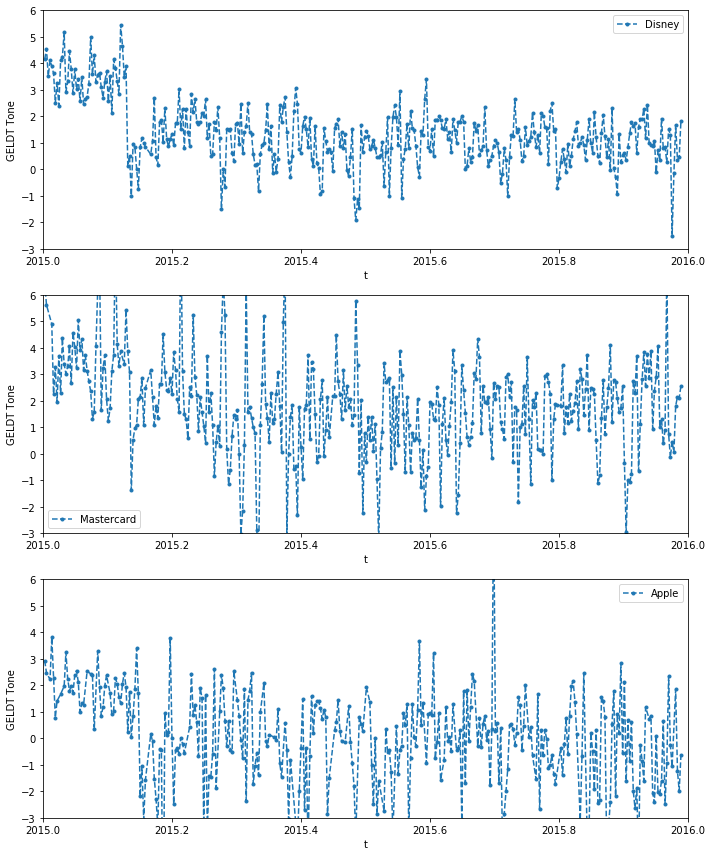

In [52]:
finalcompany=['Disney','Mastercard','Apple']
markers={'Disney':'o--','Mastercard':'o--','Apple':'o--'}
f,axarr = plt.subplots(len(finalcompany),1)
f.set_figheight(12)
f.set_figwidth(10)
counter = 1;
for fc in finalcompany:
    resultsdf = pickle.load(open(fc+'.pkl','rb'))
    fdates = np.array(resultsdf['FractionDate'])
    fdatessort = np.argsort(resultsdf['FractionDate'])
    fdates = fdates[fdatessort]
    gooddates = (fdates>2015) & (fdates<2016);
    fdates = fdates[gooddates]
    tones = np.array(resultsdf['AvgTone'])[fdatessort]
    tones = tones[gooddates]
    uniquedates = sort(list(set(list(fdates))))
    avtones = []
    for udate in uniquedates:
        avtone = np.mean(tones[fdates==udate])
        avtones.append(avtone)
    ax = axarr[counter-1]
    ax.plot(uniquedates,avtones,markers[fc],ms=3,label=fc)
    ax.set_xlim(2015,2016)
    ax.set_ylim(-3,6)
    ax.set_xlabel('t')
    #plt.ylabel('<AverageTone>')
    counter=counter+1
    ax.legend()
    ax.set_ylabel('GELDT Tone')
    ax.set_xlabel('t')
plt.tight_layout()
plt.savefig('GELDtones.png')
plt.show()

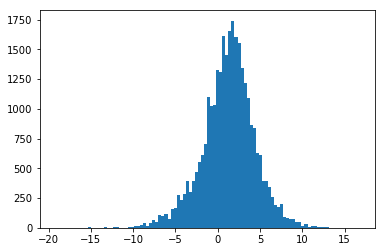

In [296]:
# Distribution of toneaverages for Disney
plt.figure()
plt.hist(tones,100)
plt.show()

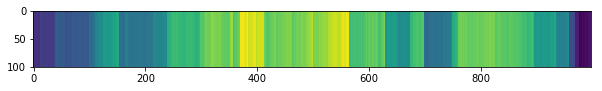

In [90]:
plt.figure(figsize=(10,5))
plt.imshow([single['financialReturnsScore'] for i in range(100)])
plt.show()